In [1]:
import csv
import pandas as pd
import numpy as np
# import geopandas as gpd
# import networkx as nx
import math
import pickle
import torch

from torch import nn
import datetime
from datetime import datetime as dt
from collections import Counter
from scipy.spatial.distance import cdist
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from matplotlib import pyplot as plt

# from pipeline_v2.utils import *
# from pipeline_v2.data_processing.utils import *


c:\Users\haowu\Anaconda3\envs\traffic\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
temp_inc = np.load("./data/np_out_5min.npy")[..., 3] # shape (21060, 207), 3557393 non-incident (0.8160243793899189), 802027 incident (0.18397562061008116)

In [82]:
temp = torch.load("./model_v2/checkpoints/finetune_try/best_Trans_T_T_F_F_7_6_5_hidden_256_batch_32_T.pt")

In [83]:
temp

{'model': OrderedDict([('encoder.linear.weight',
               tensor([[-0.1107, -0.0769, -0.1559,  ...,  0.1111,  0.3562,  0.2045],
                       [-0.0485, -0.0669, -0.1412,  ...,  0.0032,  0.1370, -0.1326],
                       [-0.0394, -0.4673, -0.0854,  ...,  0.1019, -0.0414, -0.0739],
                       ...,
                       [-0.0901, -0.0790,  0.1210,  ..., -0.0661,  0.1402, -0.2024],
                       [-0.0637, -0.0754,  0.3783,  ...,  0.0543,  0.1201,  0.1551],
                       [-0.1894,  0.2660, -0.3036,  ...,  0.1198, -0.0549, -0.2637]],
                      device='cuda:0')),
              ('encoder.linear.bias',
               tensor([-0.7653,  0.4641,  1.5293, -0.8966, -0.6158, -0.6387, -1.0538, -1.2242,
                        0.8008, -0.8299,  0.2009, -1.1434, -0.5625,  1.8411, -0.3281,  1.3951,
                        0.2060, -0.2706,  1.7899, -0.7481,  1.6954, -1.3480, -1.0496,  1.3330,
                        0.1023,  1.4570, -0.0235

In [71]:
torch.save({"model": temp}, "./model_v2/checkpoints/finetune_try/best_Trans_F_T_T_T_7_6_5_hidden_256_batch_32_F_0.5.pt")

In [3]:
waze = pickle.load(open("./data/df_waze_5min_207.pkl", "rb"))

In [4]:
np.save("./data/np_waze_5min_207.npy", waze.to_numpy())

In [8]:
temp_inc.shape[0]*temp_inc.shape[1]

4359420

In [10]:
802027/4359420

0.18397562061008116

In [17]:
len(pickle.load(open("./data_processing/Maryland/set_hwd_xd_segments_str_shp.pkl", "rb")))

1772

In [23]:
temp = pd.read_csv("/Volumes/Hao's WD/Howard/Speed/howard_xd_1min/downsampled_hwd_xd_1min.csv")

In [22]:
len(set(temp.tmc_code))

1093

In [98]:
np.unique(pickle.load(open("data/df_out_inc_5min.pkl", "rb")).values)

array([0., 1.])

In [99]:
np.unique(pickle.load(open("data/df_in_inc_5min.pkl", "rb")).values)

array([0., 1., 2.])

In [5]:
a = torch.ones(size=(32, 5, 7))
gt = torch.ones(size=(32, 100, 7))*2

In [94]:
x = torch.ones(size=(2, 3, 5))
y  = torch.ones(size=(2, 7, 5))
x, y

(tensor([[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],
 
         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]),
 tensor([[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],
 
         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]))

In [59]:
mask = torch.triu(torch.ones(3, 3) * float('-inf'), diagonal=1)
mask

tensor([[0., -inf, -inf],
        [0., 0., -inf],
        [0., 0., 0.]])

In [60]:
attn = nn.MultiheadAttention(embed_dim=5, num_heads=1, batch_first=True)

In [61]:
attn.state_dict()

OrderedDict([('in_proj_weight',
              tensor([[-0.0397,  0.3778, -0.1633, -0.1434, -0.4482],
                      [-0.0772, -0.1730,  0.2469,  0.2292, -0.1302],
                      [ 0.4837, -0.1934, -0.0632,  0.3351, -0.3873],
                      [-0.3425, -0.4074,  0.1707,  0.5291, -0.3907],
                      [-0.3835,  0.4676,  0.0051,  0.2617, -0.0803],
                      [-0.2013,  0.1542,  0.0930, -0.4368,  0.1937],
                      [ 0.2568,  0.2054,  0.4534,  0.3083,  0.2793],
                      [ 0.2378, -0.0568,  0.3151, -0.4591,  0.2063],
                      [-0.2410, -0.4042,  0.1899, -0.4275,  0.0055],
                      [-0.5296,  0.3878, -0.1301, -0.0529,  0.2762],
                      [ 0.3117,  0.0622, -0.2562,  0.2271,  0.2296],
                      [ 0.3587,  0.1685,  0.3969,  0.4017, -0.3895],
                      [-0.2673,  0.5443, -0.3263,  0.4978,  0.2098],
                      [-0.0345,  0.0746,  0.4864,  0.5186,  0.0652],
  

In [62]:
attn.eval()
with torch.no_grad():
    attn_output, attn_output_weights = attn(query=x, key=x, value=x, attn_mask=mask)

In [63]:
attn_output

tensor([[[-0.7580, -0.4855,  0.1958, -0.2045,  0.5999],
         [-0.7580, -0.4855,  0.1958, -0.2045,  0.5999],
         [-0.7580, -0.4855,  0.1958, -0.2045,  0.5999]],

        [[-0.7580, -0.4855,  0.1958, -0.2045,  0.5999],
         [-0.7580, -0.4855,  0.1958, -0.2045,  0.5999],
         [-0.7580, -0.4855,  0.1958, -0.2045,  0.5999]]])

In [64]:
attn_output_weights

tensor([[[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]],

        [[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]]])

In [65]:
attn.state_dict()

OrderedDict([('in_proj_weight',
              tensor([[-0.0397,  0.3778, -0.1633, -0.1434, -0.4482],
                      [-0.0772, -0.1730,  0.2469,  0.2292, -0.1302],
                      [ 0.4837, -0.1934, -0.0632,  0.3351, -0.3873],
                      [-0.3425, -0.4074,  0.1707,  0.5291, -0.3907],
                      [-0.3835,  0.4676,  0.0051,  0.2617, -0.0803],
                      [-0.2013,  0.1542,  0.0930, -0.4368,  0.1937],
                      [ 0.2568,  0.2054,  0.4534,  0.3083,  0.2793],
                      [ 0.2378, -0.0568,  0.3151, -0.4591,  0.2063],
                      [-0.2410, -0.4042,  0.1899, -0.4275,  0.0055],
                      [-0.5296,  0.3878, -0.1301, -0.0529,  0.2762],
                      [ 0.3117,  0.0622, -0.2562,  0.2271,  0.2296],
                      [ 0.3587,  0.1685,  0.3969,  0.4017, -0.3895],
                      [-0.2673,  0.5443, -0.3263,  0.4978,  0.2098],
                      [-0.0345,  0.0746,  0.4864,  0.5186,  0.0652],
  

In [87]:
attn_w = torch.tensor([[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]])
w_v = torch.tensor([[ 0.3117,  0.0622, -0.2562,  0.2271,  0.2296],
                      [ 0.3587,  0.1685,  0.3969,  0.4017, -0.3895],
                      [-0.2673,  0.5443, -0.3263,  0.4978,  0.2098],
                      [-0.0345,  0.0746,  0.4864,  0.5186,  0.0652],
                      [ 0.2172, -0.4693,  0.0265, -0.3346,  0.1445]])
w_out = torch.tensor([[-0.3654, -0.2716, -0.1403, -0.1443,  0.0991],
                      [ 0.0469, -0.1364,  0.0554, -0.3616,  0.0474],
                      [ 0.1651, -0.2577,  0.1006,  0.3908,  0.3800],
                      [ 0.4000, -0.1219, -0.4180, -0.1440, -0.2763],
                      [ 0.3236,  0.3394,  0.1195, -0.1002, -0.3099]])

In [91]:
x_v = x@w_v.T

In [93]:
attn_w @ x_v,  attn_w @ x_v @ w_out.T 

(tensor([[[ 0.5744,  0.9363,  0.6583,  1.1103, -0.4157],
          [ 0.5744,  0.9363,  0.6583,  1.1103, -0.4157],
          [ 0.5743,  0.9362,  0.6582,  1.1102, -0.4157]],
 
         [[ 0.5744,  0.9363,  0.6583,  1.1103, -0.4157],
          [ 0.5744,  0.9363,  0.6583,  1.1103, -0.4157],
          [ 0.5743,  0.9362,  0.6582,  1.1102, -0.4157]]]),
 tensor([[[-0.7580, -0.4855,  0.1957, -0.2046,  0.5999],
          [-0.7580, -0.4855,  0.1957, -0.2046,  0.5999],
          [-0.7579, -0.4854,  0.1957, -0.2045,  0.5998]],
 
         [[-0.7580, -0.4855,  0.1957, -0.2046,  0.5999],
          [-0.7580, -0.4855,  0.1957, -0.2046,  0.5999],
          [-0.7579, -0.4854,  0.1957, -0.2045,  0.5998]]]))

In [82]:
w_q = torch.tensor([[-0.0397,  0.3778, -0.1633, -0.1434, -0.4482],
                      [-0.0772, -0.1730,  0.2469,  0.2292, -0.1302],
                      [ 0.4837, -0.1934, -0.0632,  0.3351, -0.3873],
                      [-0.3425, -0.4074,  0.1707,  0.5291, -0.3907],
                      [-0.3835,  0.4676,  0.0051,  0.2617, -0.0803]])
w_k = torch.tensor([[-0.2013,  0.1542,  0.0930, -0.4368,  0.1937],
                      [ 0.2568,  0.2054,  0.4534,  0.3083,  0.2793],
                      [ 0.2378, -0.0568,  0.3151, -0.4591,  0.2063],
                      [-0.2410, -0.4042,  0.1899, -0.4275,  0.0055],
                      [-0.5296,  0.3878, -0.1301, -0.0529,  0.2762]])


In [83]:
x_q = x @ w_q
x_k = x @ w_k

In [85]:
x_q, x_k

(tensor([[[-0.3592,  0.0716,  0.1962,  1.2117, -1.4367],
          [-0.3592,  0.0716,  0.1962,  1.2117, -1.4367],
          [-0.3592,  0.0716,  0.1962,  1.2117, -1.4367]],
 
         [[-0.3592,  0.0716,  0.1962,  1.2117, -1.4367],
          [-0.3592,  0.0716,  0.1962,  1.2117, -1.4367],
          [-0.3592,  0.0716,  0.1962,  1.2117, -1.4367]]]),
 tensor([[[-0.4773,  0.2864,  0.9213, -1.0680,  0.9610],
          [-0.4773,  0.2864,  0.9213, -1.0680,  0.9610],
          [-0.4773,  0.2864,  0.9213, -1.0680,  0.9610]],
 
         [[-0.4773,  0.2864,  0.9213, -1.0680,  0.9610],
          [-0.4773,  0.2864,  0.9213, -1.0680,  0.9610],
          [-0.4773,  0.2864,  0.9213, -1.0680,  0.9610]]]))

In [84]:
temp = ( x_q @ x_k.transpose(1,2))/torch.sqrt(torch.tensor(5)) + mask
temp

tensor([[[-1.0295,    -inf,    -inf],
         [-1.0295, -1.0295,    -inf],
         [-1.0295, -1.0295, -1.0295]],

        [[-1.0295,    -inf,    -inf],
         [-1.0295, -1.0295,    -inf],
         [-1.0295, -1.0295, -1.0295]]])

In [78]:
sm = nn.Softmax(dim=-1)

In [86]:
sm(temp)

tensor([[[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]],

        [[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]]])

In [3]:
save_output = SaveOutput()
temp_trans = nn.Transformer(d_model=7, nhead=1, batch_first=True)

In [4]:
for module in temp_trans.modules():
    if isinstance(module, nn.MultiheadAttention):
        patch_attention(module)
        module.register_forward_hook(save_output)

In [6]:
temp_trans.eval()
with torch.no_grad():
    pred = temp_trans(src = a, tgt = gt)
    

In [7]:
pred.size()

torch.Size([32, 100, 7])

In [22]:
save_output.outputs[9][1].shape

torch.Size([1, 100, 5])

In [20]:
temp_trans.decoder

TransformerDecoder(
  (layers): ModuleList(
    (0): TransformerDecoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=7, out_features=7, bias=True)
      )
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=7, out_features=7, bias=True)
      )
      (linear1): Linear(in_features=7, out_features=2048, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=2048, out_features=7, bias=True)
      (norm1): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
      (norm3): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (dropout3): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerDecoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDyn

In [117]:
temp_trans.decoder.layers[0].state_dict()

OrderedDict([('self_attn.in_proj_weight',
              tensor([[ 0.1294,  0.2000, -0.3104, -0.0355, -0.1468, -0.2380, -0.4006],
                      [-0.0046, -0.0707, -0.0447,  0.2260, -0.0396,  0.4298,  0.3823],
                      [-0.2395,  0.1898, -0.0087, -0.2599, -0.0329, -0.1044,  0.2372],
                      [ 0.0500,  0.0019, -0.0846,  0.0850, -0.3584,  0.0636,  0.1005],
                      [ 0.3901, -0.2651, -0.0743,  0.1709, -0.0650,  0.3126, -0.1811],
                      [ 0.4627, -0.0427, -0.3861,  0.2453, -0.2135,  0.2915,  0.0321],
                      [-0.0646, -0.4516, -0.1755, -0.3793, -0.0562, -0.4044, -0.0949],
                      [ 0.2309,  0.3653,  0.1014, -0.1016, -0.3835, -0.2635, -0.4389],
                      [-0.3162,  0.3629,  0.1458, -0.2286,  0.2757, -0.1039, -0.1997],
                      [-0.1237,  0.1025,  0.3446,  0.2304,  0.1347,  0.2825,  0.3460],
                      [ 0.4522,  0.2285,  0.1941, -0.2377,  0.3093, -0.3851, -0.2009],
 

In [105]:
temp_trans.encoder.layers[0].self_attn.in_proj_weight #torch.Size([21, 7])

Parameter containing:
tensor([[ 0.0798,  0.4104, -0.3059,  0.1659,  0.2371, -0.2574, -0.4629],
        [-0.0573,  0.2224, -0.3291, -0.4333,  0.1744,  0.4360, -0.0360],
        [ 0.3657, -0.1837, -0.2318, -0.3912,  0.3992,  0.3957,  0.3668],
        [-0.4342,  0.2719, -0.3078,  0.0831,  0.0067, -0.0235, -0.3158],
        [ 0.4269,  0.1368, -0.1792,  0.3121,  0.3548,  0.1175, -0.4063],
        [ 0.3260,  0.2695, -0.3100, -0.0108,  0.2014,  0.1177,  0.1038],
        [ 0.1972, -0.2892,  0.1616, -0.3831,  0.3738,  0.3723, -0.2326],
        [ 0.3547, -0.4480, -0.4601,  0.2703, -0.1965, -0.2937,  0.1643],
        [ 0.0169, -0.3780,  0.0868, -0.4362,  0.4316,  0.3585,  0.3746],
        [ 0.2828, -0.0364, -0.1863,  0.3146,  0.2132, -0.4262, -0.2194],
        [ 0.4349, -0.2854, -0.2009,  0.2480, -0.1121, -0.3333, -0.1287],
        [ 0.0973,  0.3760, -0.2946, -0.3989, -0.1532, -0.2582, -0.4195],
        [ 0.1871,  0.1819, -0.4226,  0.1854,  0.1146,  0.2201, -0.2939],
        [-0.4464,  0.0442,  0

In [67]:
sz=5
mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
mask

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [2]:
a = pd.DataFrame(np.ones((3,3)), columns=["a", "b", "c"])

In [37]:
b = pd.DataFrame(np.array([[2, np.nan, 0], [np.nan, 0, np.nan]]).T, index=range(3), columns=["b", "c"])

In [38]:
b

b    c
0  2.0  NaN
1  NaN  0.0
2  0.0  NaN

In [39]:
b.fillna(a)

b    c
0  2.0  1.0
1  1.0  0.0
2  0.0  1.0

In [40]:
temp = a[b.columns]/b
temp

b    c
0  0.5  NaN
1  NaN  inf
2  inf  NaN

In [41]:
temp[temp == np.inf] = np.nan
temp

b   c
0  0.5 NaN
1  NaN NaN
2  NaN NaN

In [42]:
temp.mean(axis=0)

b    0.5
c    NaN
dtype: float64

In [43]:
a/temp.mean(axis=0)

a    b   c
0 NaN  2.0 NaN
1 NaN  2.0 NaN
2 NaN  2.0 NaN

In [44]:
b.fillna(a/temp.mean(axis=0))

b    c
0  2.0  NaN
1  2.0  0.0
2  0.0  NaN

In [12]:
pickle.load(open("data/speed/cranberry_tmc_1min/pivot_df_downsampled_cran_tmc_1min_all.pkl", "rb")).index

DatetimeIndex(['2019-02-11 05:30:00', '2019-02-11 05:31:00',
               '2019-02-11 05:32:00', '2019-02-11 05:33:00',
               '2019-02-11 05:34:00', '2019-02-11 05:35:00',
               '2019-02-11 05:36:00', '2019-02-11 05:37:00',
               '2019-02-11 05:38:00', '2019-02-11 05:39:00',
               ...
               '2019-07-23 20:50:00', '2019-07-23 20:51:00',
               '2019-07-23 20:52:00', '2019-07-23 20:53:00',
               '2019-07-23 20:54:00', '2019-07-23 20:55:00',
               '2019-07-23 20:56:00', '2019-07-23 20:57:00',
               '2019-07-23 20:58:00', '2019-07-23 20:59:00'],
              dtype='datetime64[ns]', name='measurement_tstamp', length=108810, freq=None)

In [5]:
pickle.load(open("./data/speed/cranberry_xd_1min/pivot_df_downsampled_xd_1min.pkl", "rb")).shape

(108810, 1104)

In [2]:
pickle.load(open("./data/speed/cranberry_tmc_1min/pivot_df_downsampled_cran_tmc_1min_all.pkl", "rb")).shape

(108806, 435)

In [4]:
start_date = dt(2019, 2, 10)
end_date = dt(2019, 7, 23)
start_time = 330 # 05:30:00 
end_time = 1260 # 21:00:00
busi_date = pd.bdate_range(start=start_date, end=end_date).date 
set_tmc_segments_within_spd_shp = pickle.load(open("pipeline_v2/data_processing/set_tmc_segments_within_spd_shp.pkl", "rb"))
df_xd_to_tmc = pickle.load(open("data/xd_to_tmc_v2.pkl", "rb"))

In [5]:
def downsample_dataset(csv_file_path, output_file_path, set_segments, busi_date, start_time, end_time):
    df_in = pd.read_csv(csv_file_path)
    df_in.measurement_tstamp = pd.to_datetime(df_in.measurement_tstamp)
    df_out = df_in[
        (df_in.tmc_code.isin(set_segments)) &
        (df_in.measurement_tstamp.dt.date.isin(busi_date)) &
        (df_in.measurement_tstamp.dt.hour*60 + df_in.measurement_tstamp.dt.minute >= start_time) &
        (df_in.measurement_tstamp.dt.hour*60 + df_in.measurement_tstamp.dt.minute < end_time) 
        ]
    df_out.to_csv(output_file_path, index=False)
    return df_out

In [6]:
def downsample_large_dataset(input_file_path, output_file_path, set_segments, busi_date, start_time, end_time):
    chunksize = 10 ** 7
    chunklist = []
    with pd.read_csv(input_file_path, chunksize=chunksize) as reader:
        for chunk in tqdm(reader):
            chunk.measurement_tstamp = pd.to_datetime(chunk.measurement_tstamp)

            # filter dataframe by selecting rows based on xd_id and timestamp of our interest
            # here we select chunk from 05:30:00 to 20:59:00 to accomodate time range for both input feature (05:30:00 - 20:25:00, 5-min frequency) and output ground truth (06:00:00 - 20:59:00, 1-min frequency)
            chunk = chunk[
                    (chunk.tmc_code.isin(set_segments)) &
                    (chunk.measurement_tstamp.dt.date.isin(busi_date)) & 
                    (chunk.measurement_tstamp.dt.hour*60 + chunk.measurement_tstamp.dt.minute >= start_time) & 
                    (chunk.measurement_tstamp.dt.hour*60 + chunk.measurement_tstamp.dt.minute < end_time) 
                    ]
            chunklist.append(chunk)

    # concat dataframe chunks and merge into one final dataframe 
    output = pd.concat(chunklist) 
    output = output.reset_index(drop=True)  # reset index
    output.to_csv(output_file_path, index=False)
    return output

In [10]:
def check_incomplete_date(df, busi_date, num_slot):
    for i in busi_date:
        if df[df.index.date == i].shape[0] != num_slot:
            print(i, df[df.index.date == i].shape[0])

In [7]:
downsampled_tmc_1min_all = downsample_large_dataset("data/speed/cranberry_tmc_1min/cran_tmc_1min_all.csv","data/speed/cranberry_tmc_1min/downsampled_cran_tmc_1min_all.csv", set_tmc_segments_within_spd_shp, busi_date, start_time, end_time)

24it [02:29,  6.24s/it]


In [8]:
downsampled_tmc_5min_all = downsample_dataset("data/speed/cranberry_tmc_5min/cran_tmc_5min_all.csv","data/speed/cranberry_tmc_5min/downsampled_cran_tmc_5min_all.csv", set_tmc_segments_within_spd_shp, busi_date, start_time, end_time)
downsampled_tmc_5min_pv = downsample_dataset("data/speed/cranberry_tmc_5min/cran_tmc_5min_pv.csv","data/speed/cranberry_tmc_5min/downsampled_cran_tmc_5min_pv.csv", set_tmc_segments_within_spd_shp, busi_date, start_time, end_time)
downsampled_tmc_5min_truck = downsample_dataset("data/speed/cranberry_tmc_5min/cran_tmc_5min_truck.csv","data/speed/cranberry_tmc_5min/downsampled_cran_tmc_5min_truck.csv", set_tmc_segments_within_spd_shp, busi_date, start_time, end_time)

In [9]:
downsampled_tmc_5min_all.shape,downsampled_tmc_5min_pv.shape,downsampled_tmc_5min_truck.shape, downsampled_tmc_1min_all.shape

((5070347, 7), (4767297, 7), (2186937, 7), (106627081, 8))

In [12]:
temp_all = downsampled_tmc_5min_all.pivot(index = "measurement_tstamp", columns = "tmc_code", values = "speed") 
temp_pv = downsampled_tmc_5min_pv.pivot(index = "measurement_tstamp", columns = "tmc_code", values = "speed") 
temp_truck = downsampled_tmc_5min_truck.pivot(index = "measurement_tstamp", columns = "tmc_code", values = "speed") 
temp_all_1min = downsampled_tmc_1min_all.pivot(index = "measurement_tstamp", columns = "tmc_code", values = "speed") 

In [13]:
temp_all.shape, temp_pv.shape, temp_truck.shape, temp_all_1min.shape

((21757, 435), (21752, 435), (21718, 424), (107302, 1000))

In [14]:
print("incomplete for all")
check_incomplete_date(temp_all, busi_date, 186)
print("incomplete for pv")
check_incomplete_date(temp_pv, busi_date, 186)
print("incomplete for truck")
check_incomplete_date(temp_truck, busi_date, 186)
print("incomplete for all (1min)")
check_incomplete_date(temp_all_1min, busi_date, 930)

incomplete for all
2019-02-22 185
2019-02-25 183
2019-04-25 185
incomplete for pv
2019-02-13 185
2019-02-20 185
2019-02-22 185
2019-02-25 181
2019-02-27 185
2019-04-25 185
incomplete for truck
2019-02-21 177
2019-02-22 178
2019-02-25 177
2019-02-27 177
2019-04-25 177
incomplete for all (1min)
2019-02-14 847
2019-03-19 924
2019-03-20 929
2019-03-29 929
2019-04-16 807
2019-04-17 362
2019-04-18 605
2019-04-19 769
2019-04-22 927
2019-04-23 927
2019-04-24 928
2019-04-25 926
2019-04-29 929
2019-04-30 929
2019-05-01 929
2019-05-03 926
2019-05-07 928
2019-05-09 925
2019-05-10 926
2019-05-14 923
2019-05-15 925
2019-05-16 924
2019-05-17 928
2019-05-20 929
2019-05-21 929
2019-05-22 929
2019-05-23 929
2019-05-24 925
2019-05-29 925
2019-05-30 928
2019-05-31 927
2019-06-03 925
2019-06-04 924
2019-06-05 926
2019-06-06 926
2019-06-07 925
2019-06-10 921
2019-06-11 921
2019-06-12 920
2019-06-13 921
2019-06-14 922
2019-06-17 922
2019-06-18 924
2019-06-19 926
2019-06-20 927
2019-06-21 928
2019-06-24 927
2

In [29]:
a = temp_all.resample("5 min").asfreq()  
a = a[
    (pd.Index(a.index.date).isin(busi_date)) &
    (a.index.hour*60 + a.index.minute >= start_time) & 
    (a.index.hour*60 + a.index.minute < end_time) 
    ]

In [30]:
a

tmc_code             104+04440  104+04441  104+04442  104+04443  104+04444  \
measurement_tstamp                                                           
2019-02-11 05:30:00       54.0       56.0       48.0       61.0       38.0   
2019-02-11 05:35:00       58.0       58.0       57.0       60.0       53.0   
2019-02-11 05:40:00       63.0       65.0       69.0       66.0       46.0   
2019-02-11 05:45:00       63.0       64.0       67.0       67.0       65.0   
2019-02-11 05:50:00       62.0       66.0       64.0       59.0       54.0   
...                        ...        ...        ...        ...        ...   
2019-07-23 20:35:00       65.0       64.0       65.0       69.0       32.0   
2019-07-23 20:40:00       64.0        NaN       83.0       74.0       68.0   
2019-07-23 20:45:00       64.0       66.0       64.0       63.0       41.0   
2019-07-23 20:50:00       61.0       69.0       71.0       71.0       60.0   
2019-07-23 20:55:00       59.0       62.0       64.0       67.0       79.0   

tmc_code             104+04445  104+04523  104+04524  104+04525  104+04526  \
measurement_tstamp                                                           
2019-02-11 05:30:00       76.0        NaN        NaN        NaN       50.0   
2019-02-11 05:35:00        NaN       47.0       47.0       47.0       52.0   
2019-02-11 05:40:00       61.0       34.0       36.0       40.0       47.0   
2019-02-11 05:45:00       74.0       37.0       39.0        NaN        NaN   
2019-02-11 05:50:00       71.0       48.0       54.0       54.0       55.0   
...                        ...        ...        ...        ...        ...   
2019-07-23 20:35:00        NaN       42.0       43.0        NaN        NaN   
2019-07-23 20:40:00       63.0       45.0        NaN        NaN        NaN   
2019-07-23 20:45:00       65.0        NaN        NaN        NaN       70.0   
2019-07-23 20:50:00       62.0       40.0       32.0        NaN       53.0   
2019-07-23 20:55:00       70.0        NaN        NaN        NaN        NaN   

tmc_code             ...  104P50699  104P50701  104P50710  104P50713  \
measurement_tstamp   ...                                               
2019-02-11 05:30:00  ...       16.0       21.0        NaN        NaN   
2019-02-11 05:35:00  ...        NaN        NaN        NaN        NaN   
2019-02-11 05:40:00  ...        NaN        NaN        NaN        NaN   
2019-02-11 05:45:00  ...        NaN        NaN        NaN        NaN   
2019-02-11 05:50:00  ...        NaN        NaN        NaN        NaN   
...                  ...        ...        ...        ...        ...   
2019-07-23 20:35:00  ...        7.0        8.0        NaN        NaN   
2019-07-23 20:40:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 20:45:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 20:50:00  ...        NaN        NaN       37.0       10.0   
2019-07-23 20:55:00  ...        NaN        NaN        NaN        NaN   

tmc_code             104P50719  104P50722  104P50734  104P50736  104P50798  \
measurement_tstamp                                                           
2019-02-11 05:30:00        NaN        NaN        NaN       97.0        NaN   
2019-02-11 05:35:00        NaN        NaN        NaN       51.0        NaN   
2019-02-11 05:40:00        NaN        NaN        NaN        NaN        NaN   
2019-02-11 05:45:00        NaN        NaN        NaN       60.0        NaN   
2019-02-11 05:50:00        NaN        NaN        NaN       52.0        NaN   
...                        ...        ...        ...        ...        ...   
2019-07-23 20:35:00        NaN        NaN        NaN       43.0        NaN   
2019-07-23 20:40:00        NaN        NaN        NaN       55.0        NaN   
2019-07-23 20:45:00        NaN        NaN       47.0        NaN        NaN   
2019-07-23 20:50:00        NaN        NaN        NaN        NaN        NaN   
2019-07-23 20:55:00        NaN        NaN        NaN        NaN        NaN   

tmc_code          

In [31]:
pickle.dump(a, open("temp.pkl", "wb"))

In [33]:
pickle.load(open("temp.pkl", "rb"))

tmc_code             104+04440  104+04441  104+04442  104+04443  104+04444  \
measurement_tstamp                                                           
2019-02-11 05:30:00       54.0       56.0       48.0       61.0       38.0   
2019-02-11 05:35:00       58.0       58.0       57.0       60.0       53.0   
2019-02-11 05:40:00       63.0       65.0       69.0       66.0       46.0   
2019-02-11 05:45:00       63.0       64.0       67.0       67.0       65.0   
2019-02-11 05:50:00       62.0       66.0       64.0       59.0       54.0   
...                        ...        ...        ...        ...        ...   
2019-07-23 20:35:00       65.0       64.0       65.0       69.0       32.0   
2019-07-23 20:40:00       64.0        NaN       83.0       74.0       68.0   
2019-07-23 20:45:00       64.0       66.0       64.0       63.0       41.0   
2019-07-23 20:50:00       61.0       69.0       71.0       71.0       60.0   
2019-07-23 20:55:00       59.0       62.0       64.0       67.0       79.0   

tmc_code             104+04445  104+04523  104+04524  104+04525  104+04526  \
measurement_tstamp                                                           
2019-02-11 05:30:00       76.0        NaN        NaN        NaN       50.0   
2019-02-11 05:35:00        NaN       47.0       47.0       47.0       52.0   
2019-02-11 05:40:00       61.0       34.0       36.0       40.0       47.0   
2019-02-11 05:45:00       74.0       37.0       39.0        NaN        NaN   
2019-02-11 05:50:00       71.0       48.0       54.0       54.0       55.0   
...                        ...        ...        ...        ...        ...   
2019-07-23 20:35:00        NaN       42.0       43.0        NaN        NaN   
2019-07-23 20:40:00       63.0       45.0        NaN        NaN        NaN   
2019-07-23 20:45:00       65.0        NaN        NaN        NaN       70.0   
2019-07-23 20:50:00       62.0       40.0       32.0        NaN       53.0   
2019-07-23 20:55:00       70.0        NaN        NaN        NaN        NaN   

tmc_code             ...  104P50699  104P50701  104P50710  104P50713  \
measurement_tstamp   ...                                               
2019-02-11 05:30:00  ...       16.0       21.0        NaN        NaN   
2019-02-11 05:35:00  ...        NaN        NaN        NaN        NaN   
2019-02-11 05:40:00  ...        NaN        NaN        NaN        NaN   
2019-02-11 05:45:00  ...        NaN        NaN        NaN        NaN   
2019-02-11 05:50:00  ...        NaN        NaN        NaN        NaN   
...                  ...        ...        ...        ...        ...   
2019-07-23 20:35:00  ...        7.0        8.0        NaN        NaN   
2019-07-23 20:40:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 20:45:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 20:50:00  ...        NaN        NaN       37.0       10.0   
2019-07-23 20:55:00  ...        NaN        NaN        NaN        NaN   

tmc_code             104P50719  104P50722  104P50734  104P50736  104P50798  \
measurement_tstamp                                                           
2019-02-11 05:30:00        NaN        NaN        NaN       97.0        NaN   
2019-02-11 05:35:00        NaN        NaN        NaN       51.0        NaN   
2019-02-11 05:40:00        NaN        NaN        NaN        NaN        NaN   
2019-02-11 05:45:00        NaN        NaN        NaN       60.0        NaN   
2019-02-11 05:50:00        NaN        NaN        NaN       52.0        NaN   
...                        ...        ...        ...        ...        ...   
2019-07-23 20:35:00        NaN        NaN        NaN       43.0        NaN   
2019-07-23 20:40:00        NaN        NaN        NaN       55.0        NaN   
2019-07-23 20:45:00        NaN        NaN       47.0        NaN        NaN   
2019-07-23 20:50:00        NaN        NaN        NaN        NaN        NaN   
2019-07-23 20:55:00        NaN        NaN        NaN        NaN        NaN   

tmc_code          

In [27]:
a.to_csv("temp.csv")

In [28]:
pd.read_csv("temp.csv")

measurement_tstamp  104+04440  104+04441  104+04442  104+04443  \
0      2019-02-11 05:30:00       54.0       56.0       48.0       61.0   
1      2019-02-11 05:35:00       58.0       58.0       57.0       60.0   
2      2019-02-11 05:40:00       63.0       65.0       69.0       66.0   
3      2019-02-11 05:45:00       63.0       64.0       67.0       67.0   
4      2019-02-11 05:50:00       62.0       66.0       64.0       59.0   
...                    ...        ...        ...        ...        ...   
30313  2019-07-23 20:35:00       65.0       64.0       65.0       69.0   
30314  2019-07-23 20:40:00       64.0        NaN       83.0       74.0   
30315  2019-07-23 20:45:00       64.0       66.0       64.0       63.0   
30316  2019-07-23 20:50:00       61.0       69.0       71.0       71.0   
30317  2019-07-23 20:55:00       59.0       62.0       64.0       67.0   

       104+04444  104+04445  104+04523  104+04524  104+04525  ...  104P50699  \
0           38.0       76.0        NaN        NaN        NaN  ...       16.0   
1           53.0        NaN       47.0       47.0       47.0  ...        NaN   
2           46.0       61.0       34.0       36.0       40.0  ...        NaN   
3           65.0       74.0       37.0       39.0        NaN  ...        NaN   
4           54.0       71.0       48.0       54.0       54.0  ...        NaN   
...          ...        ...        ...        ...        ...  ...        ...   
30313       32.0        NaN       42.0       43.0        NaN  ...        7.0   
30314       68.0       63.0       45.0        NaN        NaN  ...        NaN   
30315       41.0       65.0        NaN        NaN        NaN  ...        NaN   
30316       60.0       62.0       40.0       32.0        NaN  ...        NaN   
30317       79.0       70.0        NaN        NaN        NaN  ...        NaN   

       104P50701  104P50710  104P50713  104P50719  104P50722  104P50734  \
0           21.0        NaN        NaN        NaN        NaN        NaN   
1            NaN        NaN        NaN        NaN        NaN        NaN   
2            NaN        NaN        NaN        NaN        NaN        NaN   
3            NaN        NaN        NaN        NaN        NaN        NaN   
4            NaN        NaN        NaN        NaN        NaN        NaN   
...          ...        ...        ...        ...        ...        ...   
30313        8.0        NaN        NaN        NaN        NaN        NaN   
30314        NaN        NaN        NaN        NaN        NaN        NaN   
30315        NaN        NaN        NaN        NaN        NaN       47.0   
30316        NaN       37.0       10.0        NaN        NaN        NaN   
30317        NaN        NaN        NaN        NaN        NaN        NaN   

       104P50736  104P50798  104P50804  
0           97.0        NaN        NaN  
1           51.0        NaN        NaN  
2            NaN        NaN        NaN  
3           60.0        NaN        NaN  
4           52.0        NaN        NaN  
...          ...        ...        ...  
30313       43.0        NaN        NaN  
30314       55.0        NaN        NaN  
30315        NaN        NaN        NaN  
30316        NaN        NaN        NaN  
30317        NaN        NaN        NaN  

[30318 rows x 436 columns]

In [26]:
check_incomplete_date(a, busi_date, 186)

In [86]:
df_tmc_5min_all = pd.read_csv("data/speed/cranberry_tmc_5min/cran_tmc_5min_all.csv")

In [100]:
raw_temp = df_tmc_5min_all.pivot(index = "measurement_tstamp", columns = "tmc_code", values = "speed") 

In [101]:
raw_temp

tmc_code             104+04440  104+04441  104+04442  104+04443  104+04444  \
measurement_tstamp                                                           
2019-02-10 00:00:00       61.0       62.0       63.0       63.0        NaN   
2019-02-10 00:05:00        NaN       64.0       67.0       63.0       50.0   
2019-02-10 00:10:00        NaN       79.0       80.0        NaN       71.0   
2019-02-10 00:15:00        NaN        NaN       80.0       79.0        NaN   
2019-02-10 00:20:00        NaN       59.0        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2019-07-23 23:35:00       60.0       62.0       63.0       61.0        NaN   
2019-07-23 23:40:00       58.0       58.0       66.0       66.0        NaN   
2019-07-23 23:45:00       60.0       63.0       65.0       71.0       50.0   
2019-07-23 23:50:00       59.0       63.0       65.0       66.0       62.0   
2019-07-23 23:55:00       57.0       60.0       62.0        NaN        NaN   

tmc_code             104+04445  104+04523  104+04524  104+04525  104+04526  \
measurement_tstamp                                                           
2019-02-10 00:00:00       70.0        NaN        NaN        NaN       61.0   
2019-02-10 00:05:00       66.0       45.0       45.0        NaN        NaN   
2019-02-10 00:10:00       71.0        NaN        NaN        NaN        NaN   
2019-02-10 00:15:00       60.0        NaN       39.0        NaN        NaN   
2019-02-10 00:20:00       60.0        NaN       49.0        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2019-07-23 23:35:00       51.0       50.0       39.0        NaN        NaN   
2019-07-23 23:40:00       67.0        NaN        NaN        NaN        NaN   
2019-07-23 23:45:00       65.0        NaN        NaN        NaN        NaN   
2019-07-23 23:50:00       60.0        NaN        NaN        NaN        NaN   
2019-07-23 23:55:00       64.0       45.0       53.0        NaN        NaN   

tmc_code             ...  104P50699  104P50701  104P50710  104P50713  \
measurement_tstamp   ...                                               
2019-02-10 00:00:00  ...        NaN        NaN        NaN        NaN   
2019-02-10 00:05:00  ...        NaN        NaN        NaN        NaN   
2019-02-10 00:10:00  ...        NaN        NaN        NaN        NaN   
2019-02-10 00:15:00  ...        NaN        NaN        NaN        NaN   
2019-02-10 00:20:00  ...        NaN        NaN        NaN        NaN   
...                  ...        ...        ...        ...        ...   
2019-07-23 23:35:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 23:40:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 23:45:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 23:50:00  ...        NaN        NaN        NaN        NaN   
2019-07-23 23:55:00  ...        NaN        NaN        NaN        NaN   

tmc_code             104P50719  104P50722  104P50734  104P50736  104P50798  \
measurement_tstamp                                                           
2019-02-10 00:00:00        NaN        NaN       41.0       51.0        NaN   
2019-02-10 00:05:00        NaN        NaN        NaN       42.0        NaN   
2019-02-10 00:10:00        NaN        NaN        NaN       42.0        NaN   
2019-02-10 00:15:00        NaN        NaN        NaN        NaN        NaN   
2019-02-10 00:20:00        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2019-07-23 23:35:00        NaN        NaN        NaN        NaN        NaN   
2019-07-23 23:40:00        NaN        NaN        NaN        NaN        NaN   
2019-07-23 23:45:00        NaN        NaN        NaN        NaN        NaN   
2019-07-23 23:50:00        NaN        NaN        NaN        NaN        NaN   
2019-07-23 23:55:00        NaN        NaN        NaN       43.0        NaN   

tmc_code          

In [22]:
gdf_tmc_cranberry = gpd.read_file("./data/shape/tmc_shape_cranberry/tmc_cranberry_v2.geojson")

In [81]:
curr_tmc = "104P51538"
prev_tmc = "104N09223"
curr_geo = gdf_tmc_cranberry[gdf_tmc_cranberry.tmc == curr_tmc].geometry.values[0]
prev_geo = gdf_tmc_cranberry[gdf_tmc_cranberry.tmc == prev_tmc].geometry.values[0]
curr_coords = list(list(curr_geo.geoms)[0].coords)
prev_coords = list(list(prev_geo.geoms)[0].coords)
curr_start_long, curr_start_lat = curr_coords[0]
curr_end_long, curr_end_lat = curr_coords[1]
prev_start_long, prev_start_lat = prev_coords[-2]
prev_end_long, prev_end_lat = prev_coords[-1]
curr_vec = [float(curr_end_long)-float(curr_start_long), float(curr_end_lat)-float(curr_start_lat)]
prev_vec = [float(prev_end_long)-float(prev_start_long), float(prev_end_lat)-float(prev_start_lat)]
unit_curr_vec = curr_vec/np.linalg.norm(curr_vec)
unit_prev_vec = prev_vec/np.linalg.norm(prev_vec)
np.arccos(np.clip(np.dot(unit_curr_vec, unit_prev_vec), -1.0, 1.0))/np.pi

0.91628617689041

In [80]:
prev_start_long, prev_start_lat, prev_end_long, prev_end_lat 

(-80.01824, 40.44941, -80.01818, 40.44923)

In [72]:
prev_coords

[(-80.01832, 40.44969),
 (-80.01828, 40.44954),
 (-80.01824, 40.44941),
 (-80.01818, 40.44923)]

In [9]:
pd_spd_tmc_5min_all = pd.read_csv("./data/speed/cranberry_tmc_5min/cran_2019_npmrds_all/cran_2019_npmrds.csv")

In [14]:
with open("pipeline_v2/data_processing/set_tmc_segments_for_upstream.pkl", "rb") as f:
    set_tmc_segments_for_upstream = pickle.load(f)

In [19]:
len(set_tmc_segments_for_upstream), len(set_tmc_segments_for_upstream.intersection(set(pd_spd_tmc_5min_all.tmc_code.unique())))

(273, 209)

In [11]:
# TMC Shapefile
gdf_tmc_cranberry = gpd.read_file("./data/shape/tmc_shape_cranberry/tmc_cranberry_v2.geojson")  # id and geometry of 1037 unique tmc segments in cranberry shape file, 1000 of which are covered in "set_spd_tmc_segments" and 273 are covered in "set_inc_segments"; shape (1037, 16) 
set_shp_tmc_segments = set(gdf_tmc_cranberry.tmc.unique()) # 1037 tmc segments covered in shapefile

<AxesSubplot: >

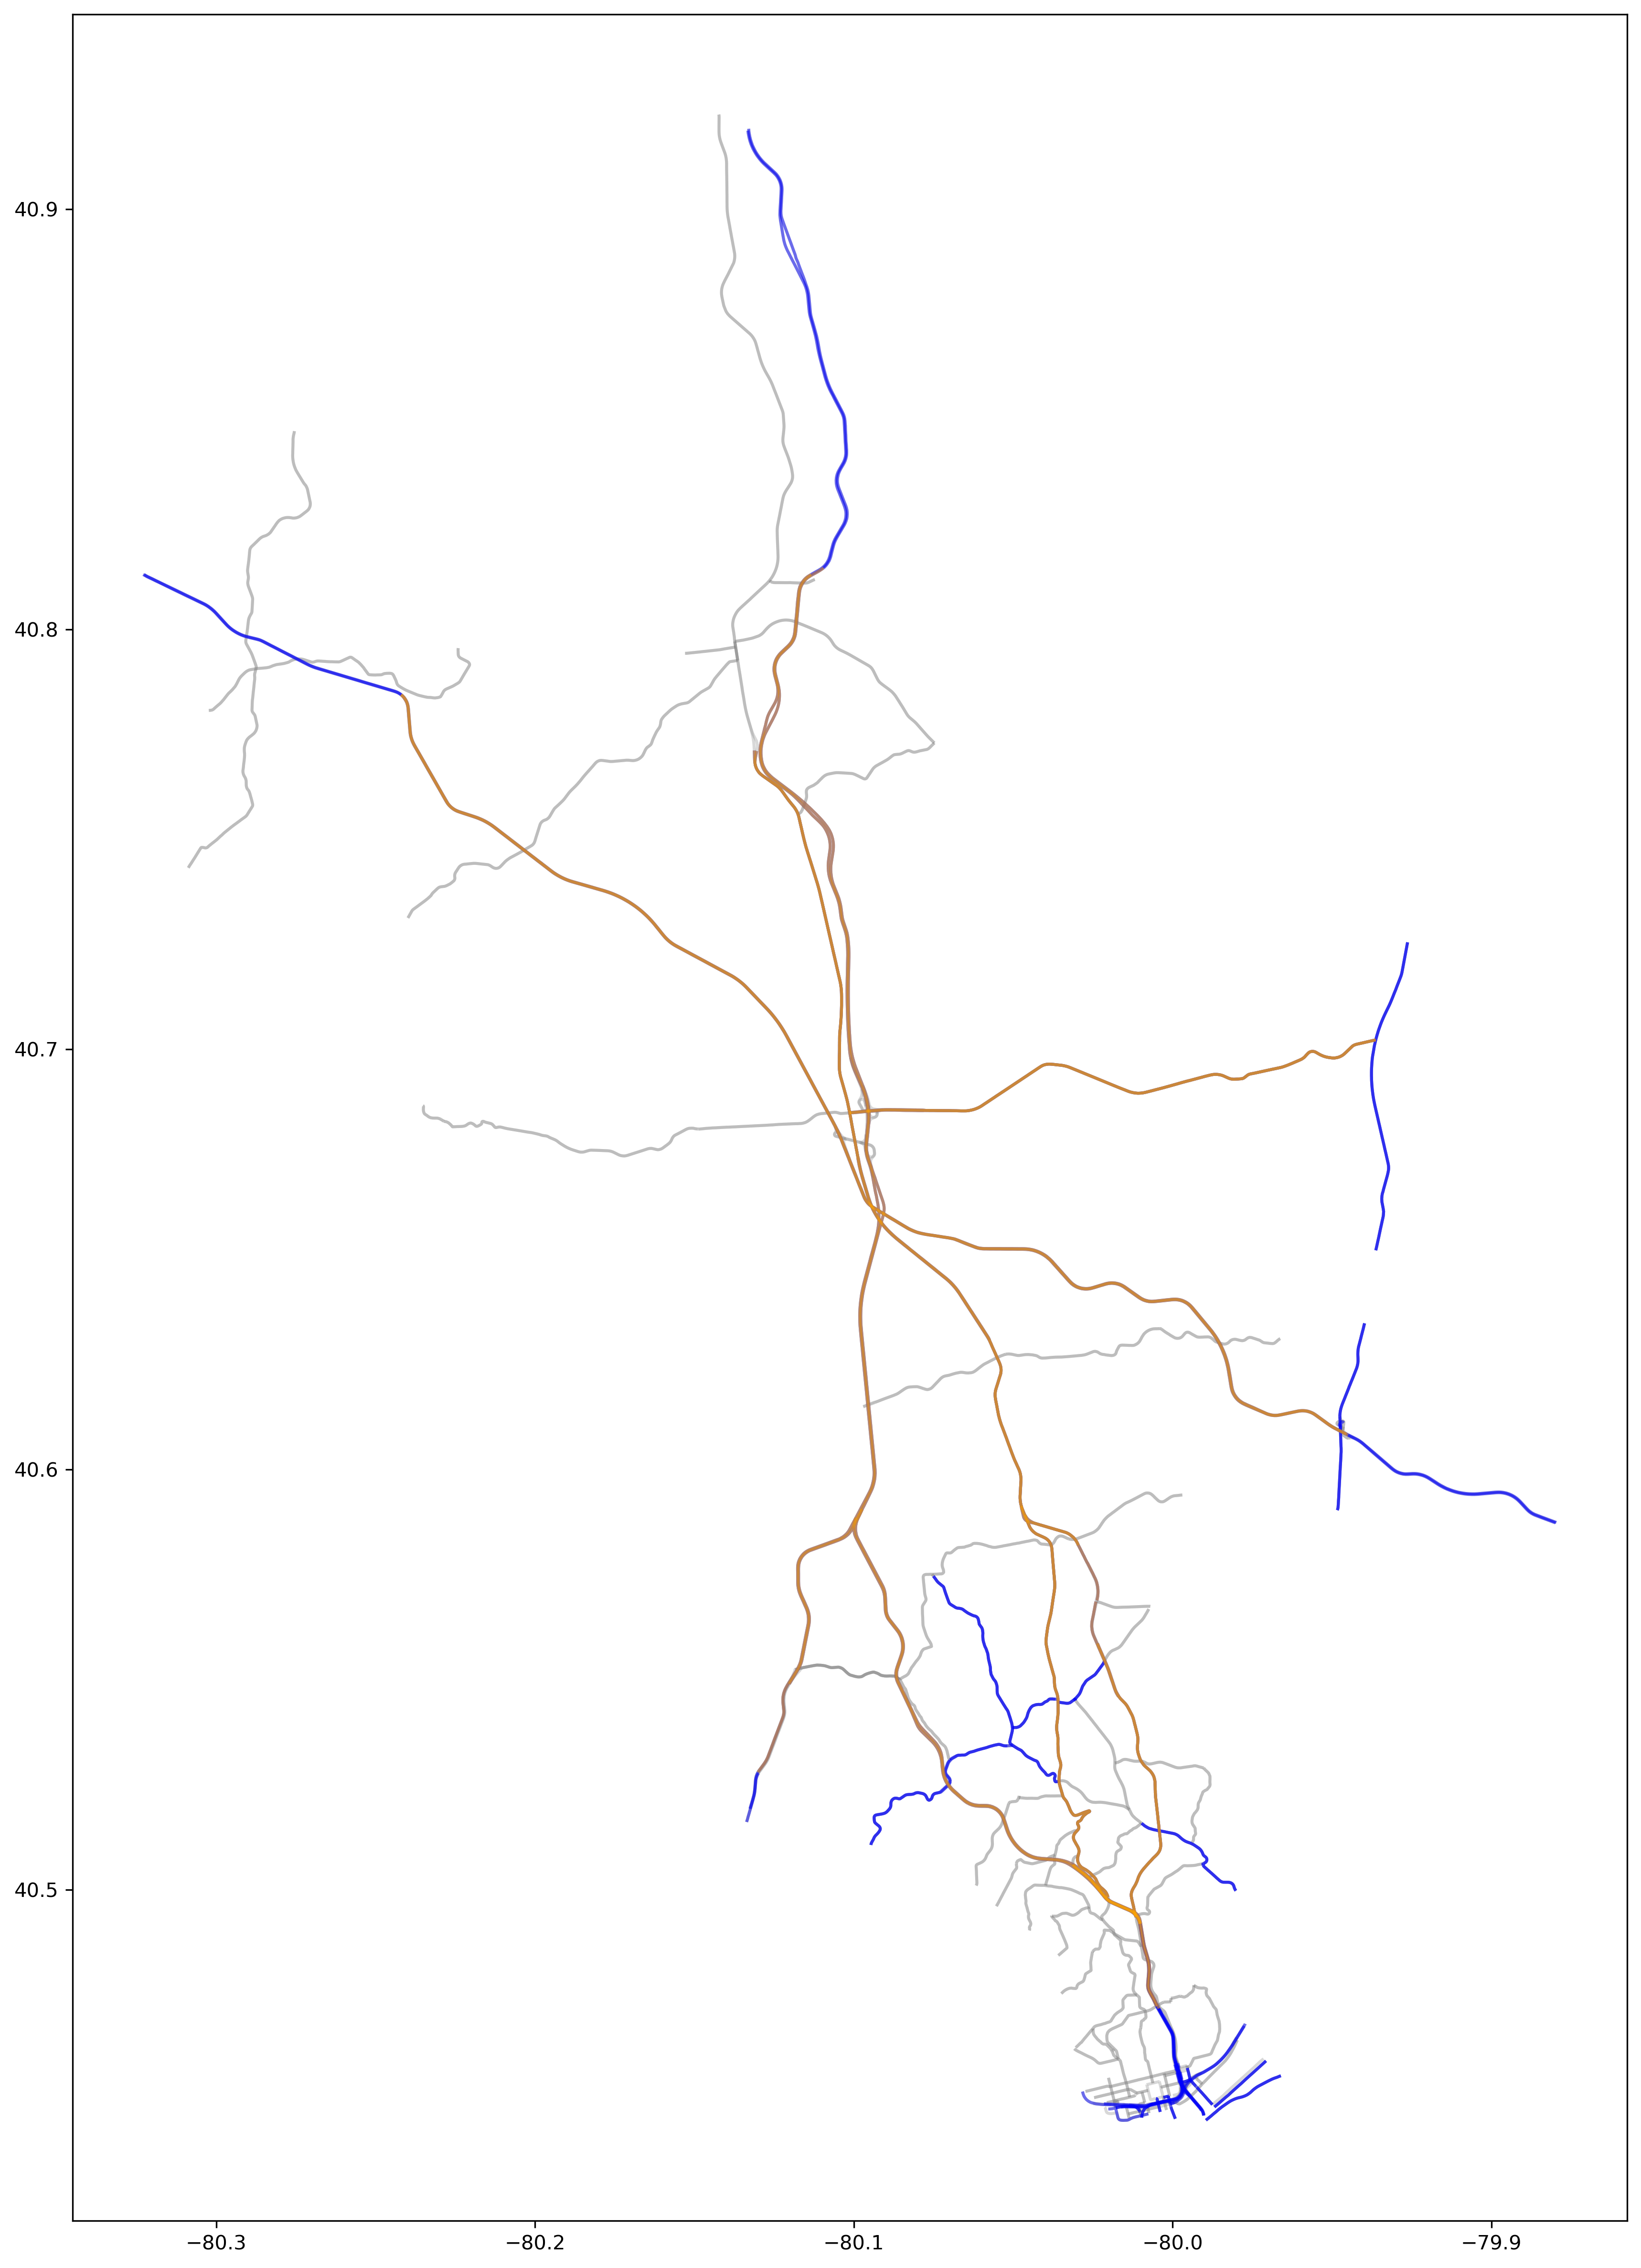

In [17]:
# Visualize 273 TMC segments covered by both shapefile and speeddata
fig, ax = plt.subplots(1,figsize=(30,20), dpi=300)
gdf_tmc_cranberry.plot(ax=ax, color="grey", alpha=0.3)
gdf_tmc_cranberry[gdf_tmc_cranberry.tmc.isin(set(pd_spd_tmc_5min_all.tmc_code.unique()))].plot(ax=ax, color="blue", alpha=0.5)
gdf_tmc_cranberry[(gdf_tmc_cranberry.tmc.isin(set(pd_spd_tmc_5min_all.tmc_code.unique()))) & (gdf_tmc_cranberry.tmc.isin(set_tmc_segments_for_upstream))].plot(ax=ax, color="orange", alpha=0.5)

In [ ]:
# get indices of old_col that will remain as new columns
col_idx = []  # will store the indices of 194 old columns that will become new_X (173 inc, 21 weather & time)
col_name = []
for i in range(987):
    c = old_col[i]
    if "inc" in c and c[4:] in set_target_tmc:
        col_idx.append(i)
        col_name.append(c[4:])
col_idx += list(range(987, 1008)) # len 194, incident features: 1~173, weather & time: 174~194

In [2]:
df_tmc_cran = pd.read_csv("./data/cranberry_tmc_5min/cran_2019_tmc.csv")

In [5]:
df_tmc_cran.measurement_tstamp = pd.to_datetime(df_tmc_cran.measurement_tstamp)
df_tmc_cran = df_tmc_cran[
    (df_tmc_cran.measurement_tstamp.dt.date.isin(busi_date)) &
    (df_tmc_cran.measurement_tstamp.dt.hour*60 + df_tmc_cran.measurement_tstamp.dt.minute >= 330) &
    (df_tmc_cran.measurement_tstamp.dt.hour*60 + df_tmc_cran.measurement_tstamp.dt.minute < 1260) 
    ]

In [6]:
df_tmc_cran

tmc_code  measurement_tstamp  speed  average_speed  \
1434570    104P51574 2019-02-11 05:30:00   38.0           29.0   
1434571    104P51574 2019-02-11 05:31:00   38.0           29.0   
1434572    104P51574 2019-02-11 05:32:00   38.0           29.0   
1434573    104P51574 2019-02-11 05:33:00   38.0           29.0   
1434574    104P51574 2019-02-11 05:34:00   38.0           29.0   
...              ...                 ...    ...            ...   
232869517  104P11612 2019-07-23 20:55:00   47.0           39.0   
232869518  104P11612 2019-07-23 20:56:00   47.0           39.0   
232869519  104P11612 2019-07-23 20:57:00   47.0           39.0   
232869520  104P11612 2019-07-23 20:58:00   48.0           39.0   
232869521  104P11612 2019-07-23 20:59:00   48.0           39.0   

           reference_speed  travel_time_minutes  confidence_score  cvalue  
1434570               42.0                 0.50              30.0   100.0  
1434571               42.0                 0.50              30.0   100.0  
1434572               42.0                 0.50              30.0   100.0  
1434573               42.0                 0.50              30.0   100.0  
1434574               42.0                 0.50              30.0   100.0  
...                    ...                  ...               ...     ...  
232869517             44.0                 0.19              30.0    95.0  
232869518             44.0                 0.19              30.0    95.0  
232869519             44.0                 0.19              30.0    95.0  
232869520             44.0                 0.18              30.0    87.0  
232869521             44.0                 0.18              30.0    87.0  

[106627081 rows x 8 columns]

In [7]:
df_tmc_cran.to_csv("./data/cranberry_tmc_5min/downsampled_tmc_all.csv", index=False)

In [2]:
df_xd_cran = pd.read_csv("./data/cranberry_xd_1min/cran_2019_xd.csv")

In [5]:
df_xd_cran.measurement_tstamp = pd.to_datetime(df_xd_cran.measurement_tstamp)
df_xd_cran = df_xd_cran[
    (df_xd_cran.measurement_tstamp.dt.date.isin(busi_date)) &
    (df_xd_cran.measurement_tstamp.dt.hour*60 + df_xd_cran.measurement_tstamp.dt.minute >= 330) &
    (df_xd_cran.measurement_tstamp.dt.hour*60 + df_xd_cran.measurement_tstamp.dt.minute < 1260) 
    ]

In [6]:
df_xd_cran

xd_id  measurement_tstamp  speed  average_speed  \
1568489     135063797 2019-02-11 05:30:00   22.0           17.0   
1568490     135063797 2019-02-11 05:31:00   22.0           17.0   
1568491     135063797 2019-02-11 05:32:00   22.0           17.0   
1568492     135063797 2019-02-11 05:33:00   22.0           17.0   
1568493     135063797 2019-02-11 05:34:00   22.0           17.0   
...               ...                 ...    ...            ...   
256017817  1310540446 2019-07-23 20:55:00   49.0           49.0   
256017818  1310540446 2019-07-23 20:56:00   49.0           49.0   
256017819  1310540446 2019-07-23 20:57:00   49.0           49.0   
256017820  1310540446 2019-07-23 20:58:00   49.0           49.0   
256017821  1310540446 2019-07-23 20:59:00   49.0           49.0   

           reference_speed  travel_time_minutes  confidence_score  cvalue  
1568489               28.0                 0.05              30.0     NaN  
1568490               28.0                 0.05              30.0     NaN  
1568491               28.0                 0.05              30.0     NaN  
1568492               28.0                 0.05              30.0     NaN  
1568493               28.0                 0.05              30.0     NaN  
...                    ...                  ...               ...     ...  
256017817             49.0                 0.71              20.0     NaN  
256017818             49.0                 0.71              20.0     NaN  
256017819             49.0                 0.71              20.0     NaN  
256017820             49.0                 0.71              20.0     NaN  
256017821             49.0                 0.71              20.0     NaN  

[117040954 rows x 8 columns]

In [7]:
df_xd_cran.to_csv("./data/cranberry_xd_1min/downsampled_xd.csv", index=False)

In [5]:
df_xd_cran

xd_id   measurement_tstamp  speed  average_speed  \
0           135063797  2019-02-10 00:00:00   28.0           28.0   
1           135063797  2019-02-10 00:01:00   28.0           28.0   
2           135063797  2019-02-10 00:02:00   28.0           28.0   
3           135063797  2019-02-10 00:03:00   28.0           28.0   
4           135063797  2019-02-10 00:04:00   28.0           28.0   
...               ...                  ...    ...            ...   
256017996  1310540446  2019-07-23 23:55:00   49.0           49.0   
256017997  1310540446  2019-07-23 23:56:00   49.0           49.0   
256017998  1310540446  2019-07-23 23:57:00   49.0           49.0   
256017999  1310540446  2019-07-23 23:58:00   49.0           49.0   
256018000  1310540446  2019-07-23 23:59:00   49.0           49.0   

           reference_speed  travel_time_minutes  confidence_score  cvalue  
0                     28.0                 0.04              10.0     NaN  
1                     28.0                 0.04              10.0     NaN  
2                     28.0                 0.04              10.0     NaN  
3                     28.0                 0.04              10.0     NaN  
4                     28.0                 0.04              10.0     NaN  
...                    ...                  ...               ...     ...  
256017996             49.0                 0.71              10.0     NaN  
256017997             49.0                 0.71              10.0     NaN  
256017998             49.0                 0.71              10.0     NaN  
256017999             49.0                 0.71              10.0     NaN  
256018000             49.0                 0.71              10.0     NaN  

[256018001 rows x 8 columns]

In [4]:
df_tmc_cran

tmc_code   measurement_tstamp  speed  average_speed  \
0          104P51574  2019-02-10 00:00:00   45.0           42.0   
1          104P51574  2019-02-10 00:01:00   45.0           42.0   
2          104P51574  2019-02-10 00:02:00   45.0           42.0   
3          104P51574  2019-02-10 00:03:00   45.0           42.0   
4          104P51574  2019-02-10 00:04:00   45.0           42.0   
...              ...                  ...    ...            ...   
232869697  104P11612  2019-07-23 23:55:00   43.0           44.0   
232869698  104P11612  2019-07-23 23:56:00   43.0           44.0   
232869699  104P11612  2019-07-23 23:57:00   44.0           44.0   
232869700  104P11612  2019-07-23 23:58:00   48.0           44.0   
232869701  104P11612  2019-07-23 23:59:00   48.0           44.0   

           reference_speed  travel_time_minutes  confidence_score  cvalue  
0                     42.0                 0.42              30.0   100.0  
1                     42.0                 0.42              30.0   100.0  
2                     42.0                 0.42              30.0   100.0  
3                     42.0                 0.42              30.0   100.0  
4                     42.0                 0.42              30.0   100.0  
...                    ...                  ...               ...     ...  
232869697             44.0                 0.20              30.0   100.0  
232869698             44.0                 0.20              30.0   100.0  
232869699             44.0                 0.20              10.0     NaN  
232869700             44.0                 0.18              30.0    71.0  
232869701             44.0                 0.18              30.0    74.0  

[232869702 rows x 8 columns]

In [7]:
df_tmc_cran.measurement_tstamp = pd.to_datetime(df_tmc_cran.measurement_tstamp)
temp = df_tmc_cran.pivot(index = "measurement_tstamp", columns = "tmc_code", values = "speed") 

In [ ]:
temp

In [14]:
# spd_tmc contains the speed data of tmc segments, and only covers 195 tmc segments in our craberry shapefile
gdf_xd_cranberry = gpd.read_file("./data/shape/xd_shape_cranberry/xd_cranberry_for_sjoin_v2.geojson")  # features of 1401 unique xd segments manually selected from PA shape file through QGIS; shape (1401, 25)
gdf_tmc_cranberry = gpd.read_file("./data/shape/tmc_shape_cranberry/tmc_cranberry_v2.geojson")  # id and geometry of 1037 unique tmc segments in cranberry shape file, 383 of which are covered in "set_spd_tmc_segments"; shape (1037, 16) 

In [21]:
with open("./id_cranberry_XD.txt", "w") as f:
    for i, id in enumerate(list(gdf_xd_cranberry.XDSegID)):
        f.write(id)
        if i != len(list(gdf_xd_cranberry.XDSegID))-1:
            f.write(",")


In [ ]:
with open("./id_cranberry_TMC.txt", "w") as f:
    for i, id in enumerate(list(gdf_tmc_cranberry.tmc)):
        f.write(id)
        if i != len(list(gdf_tmc_cranberry.tmc))-1:
            f.write(",")

In [2]:
# dict_upstream_unique_xd_str = pickle.load(open("./data/dict_upstream_unique_xd_str.pkl", "rb"))
# dict_upstream_unique_tmc = pickle.load(open("./data/dict_upstream_unique_tmc.pkl", "rb"))
# dict_upstream_unique_xd_str_5_miles = pickle.load(open("./data/dict_upstream_unique_xd_str_5_miles.pkl", "rb"))
# dict_upstream_unique_tmc_5_miles = pickle.load(open("./data/dict_upstream_unique_tmc_5_miles.pkl", "rb"))

# dict_upstream_xd_str = pickle.load(open("./data/dict_upstream_xd_str.pkl", "rb"))
# dict_upstream_tmc = pickle.load(open("./data/dict_upstream_tmc.pkl", "rb"))
# dict_upstream_xd_str_5_miles = pickle.load(open("./data/dict_upstream_xd_str_5_miles.pkl", "rb"))
# dict_upstream_tmc_5_miles = pickle.load(open("./data/dict_upstream_tmc_5_miles.pkl", "rb"))

# set_tmc_segments_for_upstream = pickle.load(open("./pipeline_v2/data_processing/set_tmc_segments_for_upstream.pkl", "rb"))
# set_xd_segments_str_for_upstream = pickle.load(open("./pipeline_v2/data_processing/set_xd_segments_str_for_upstream.pkl", "rb"))

# dict_miles_tmc_for_upstream = pickle.load(open("./pipeline_v2/data_processing/dict_miles_tmc_for_upstream.pkl", "rb"))
# dict_miles_xd_for_upstream = pickle.load(open("./pipeline_v2/data_processing/dict_miles_xd_str_for_upstream.pkl", "rb"))

# dict_prev_tmc = pickle.load(open("./data/dict_prev_tmc.pkl", "rb"))
# dict_prev_xd = pickle.load(open("./data/dict_prev_xd.pkl", "rb"))

gdf_shp_tmc = gpd.read_file('./data/shapefiles/tmc_shape_cranberry/cranberry.shp').drop_duplicates()
gdf_shp_xd = gpd.read_file("./data/shapefiles/xd_shape_cranberry/xd_cranberry_for_sjoin.geojson") # 556 xd segments from shapefile
gdf_shp_xd = gdf_shp_xd.rename(columns={"XDSegID":"id_xd_str", "PreviousXD":"id_xd_prev", "NextXDSegI":"id_xd_next", "Miles":"miles_xd"})

In [3]:
gdf_shp_tmc_cran_new = gpd.read_file("./data/shapefiles/network_tmc.geojson")

<AxesSubplot: >

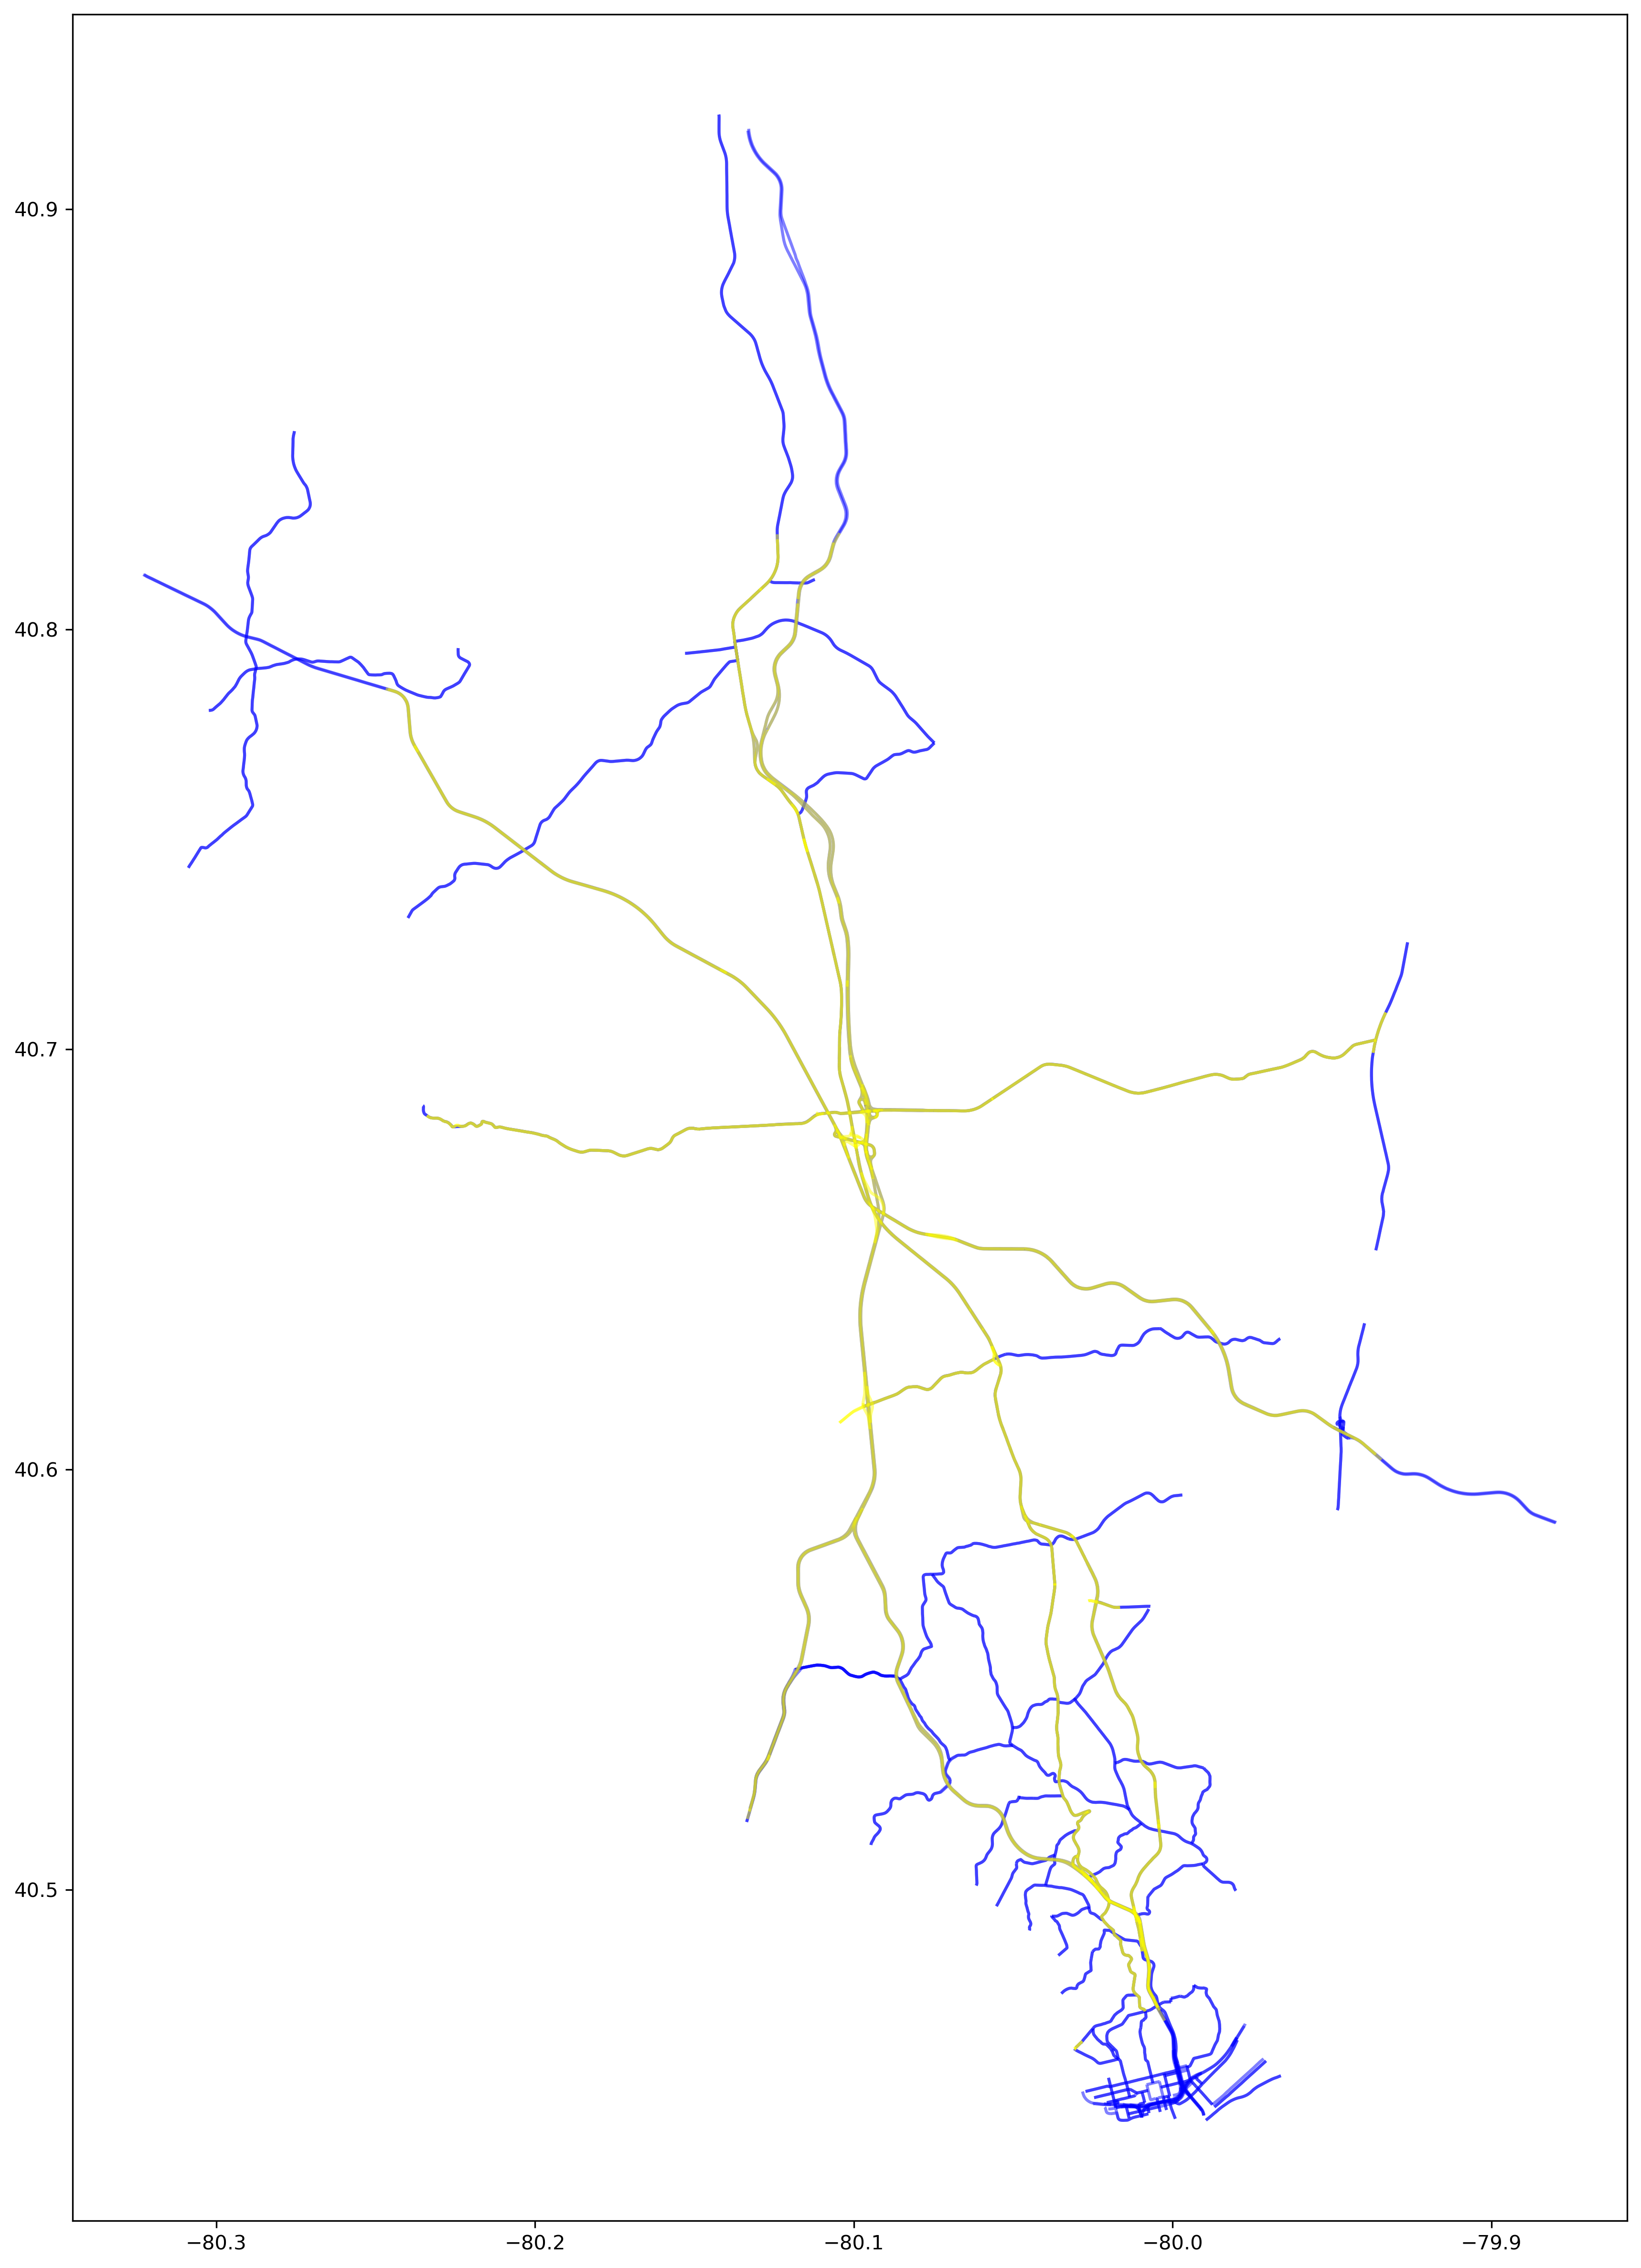

In [9]:
fig, ax = plt.subplots(1,figsize=(30,20), dpi=300)
# gdf_shp_tmc.plot(ax=ax, color="yellow", alpha=0.7) # new entire TMC segments in cranberry 
gdf_shp_tmc_cran_new.plot(ax=ax, color="blue", alpha=0.5) # new entire TMC segments in cranberry 
gdf_shp_xd.plot(ax=ax, color="yellow", alpha=0.5) # new entire TMC segments in cranberry 

In [9]:
limit = 5

<AxesSubplot: >

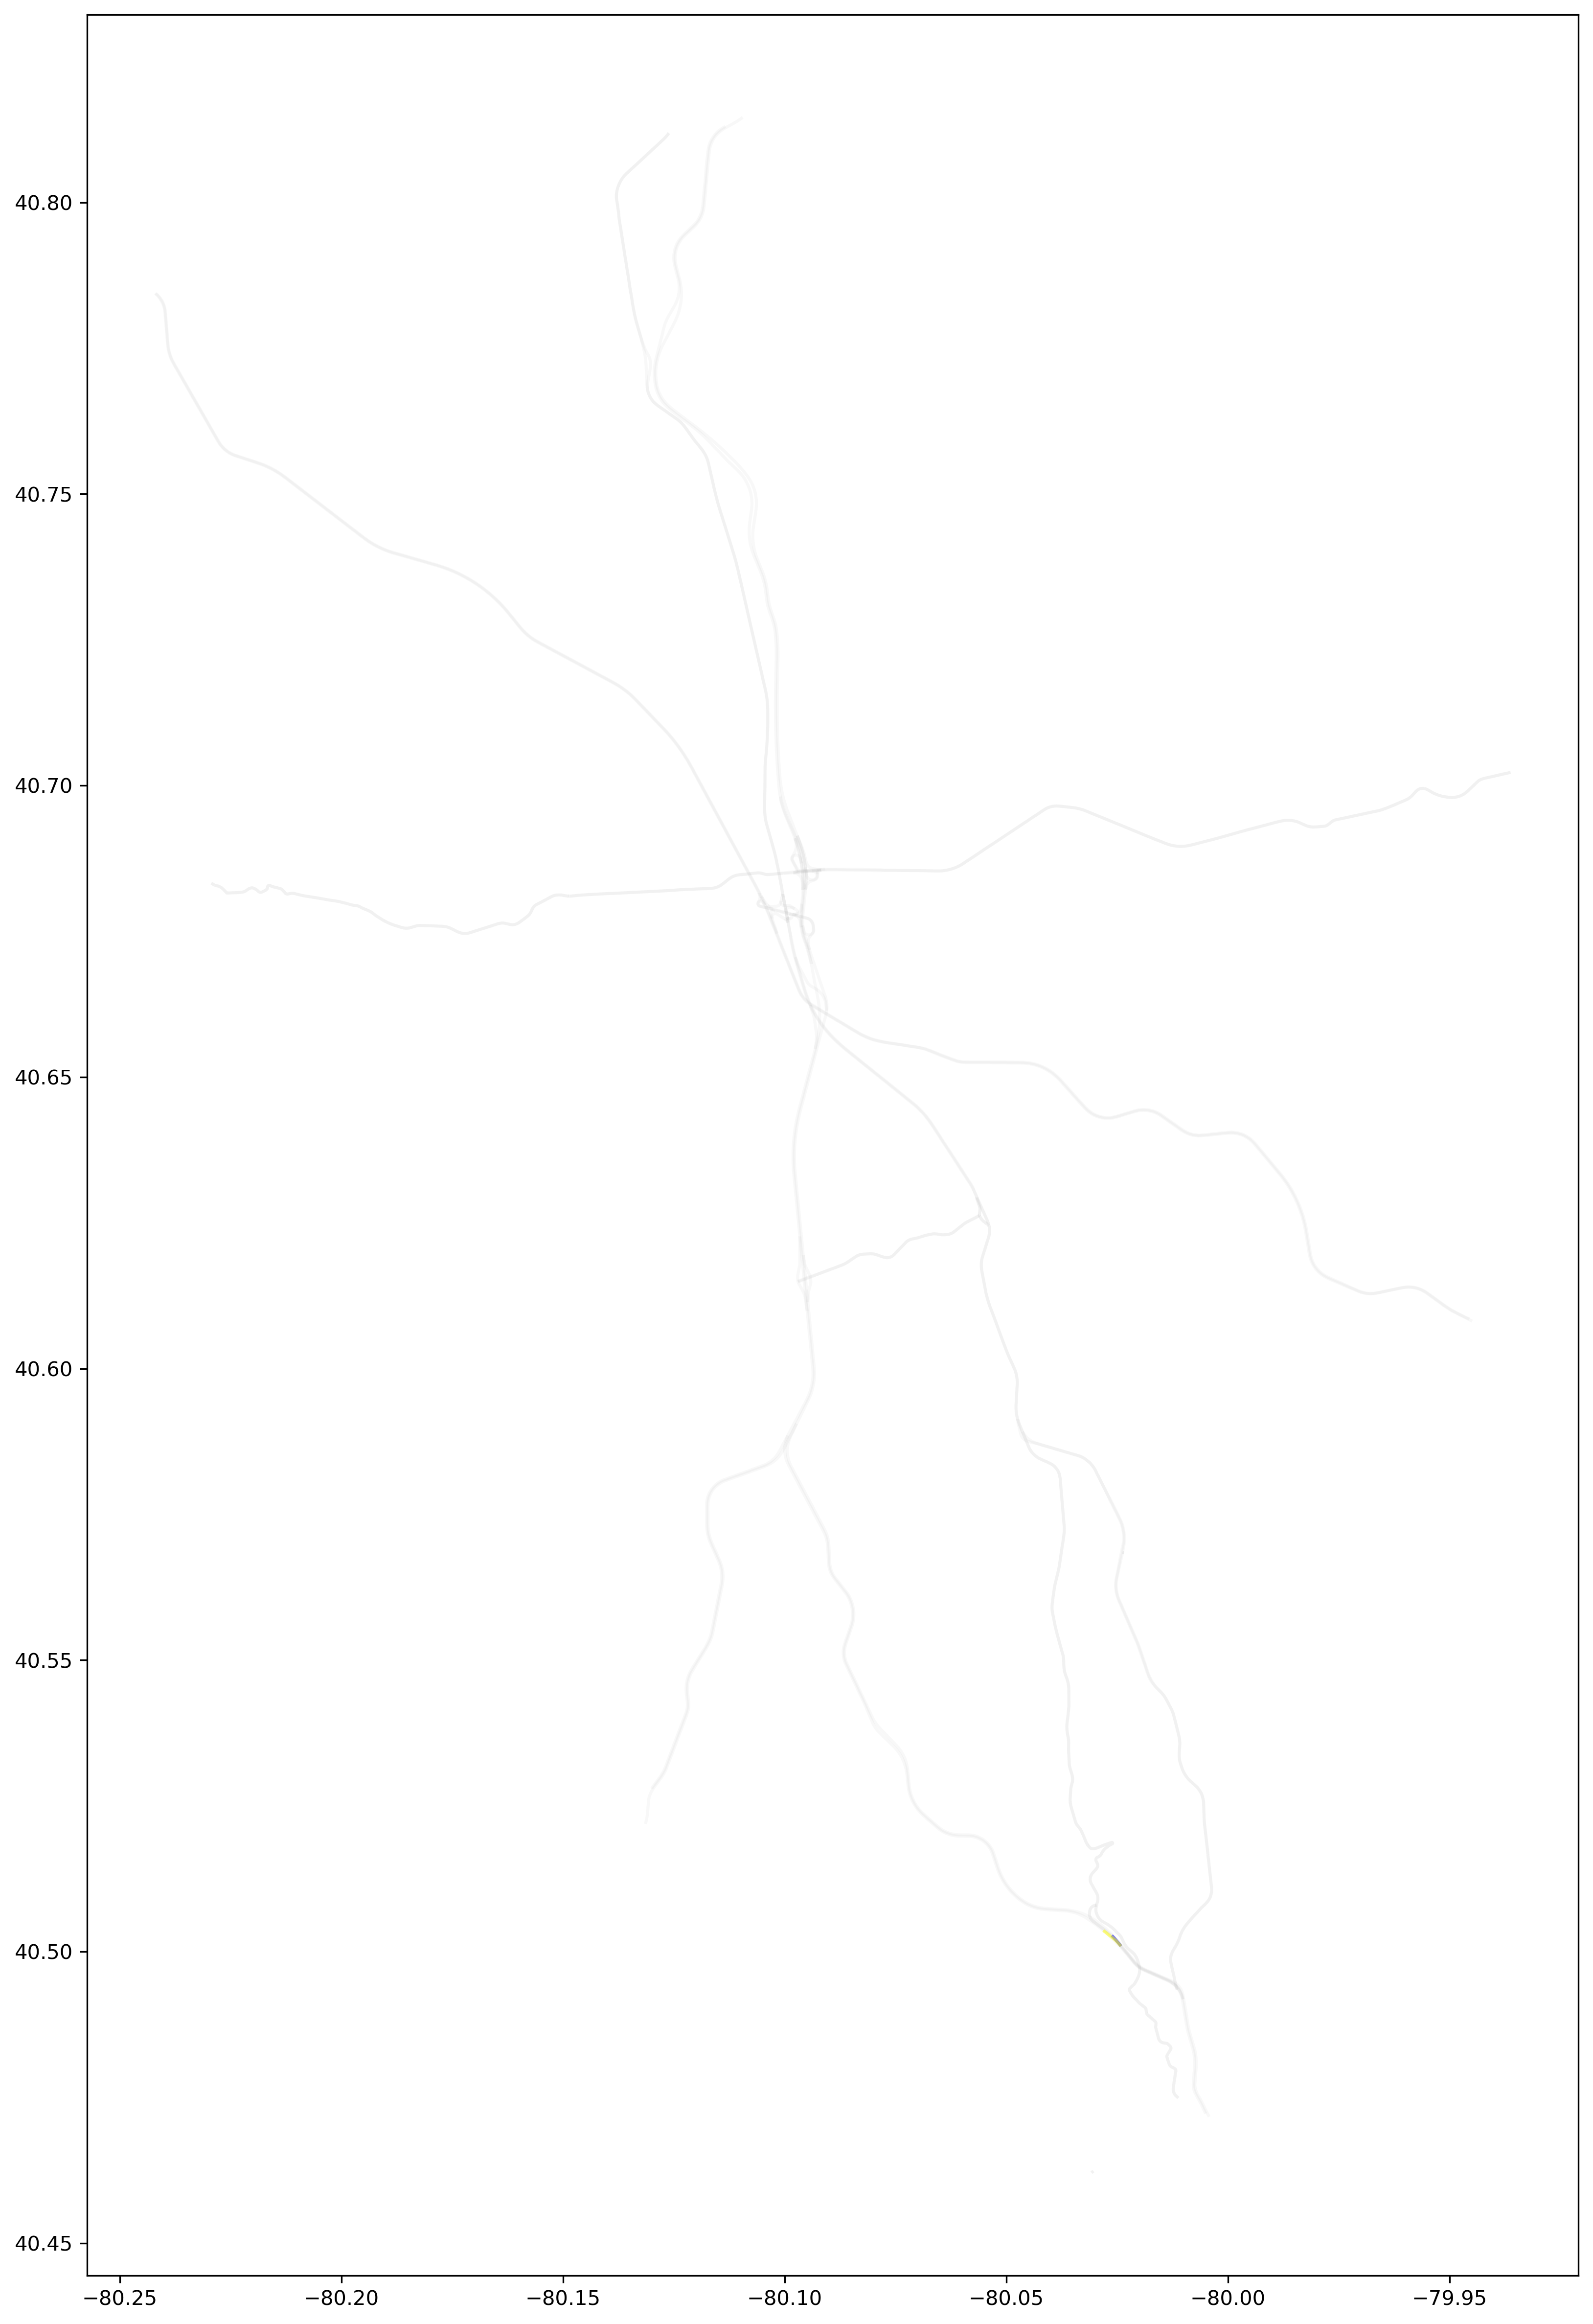

In [75]:
fig, ax = plt.subplots(1,figsize=(30,20), dpi=300)
gdf_shp_tmc.plot(ax=ax, color="grey", alpha=0.05) # entire TMC segments in cranberry 
# gdf_shp_tmc[gdf_shp_tmc.id == "104P06223"].plot(ax=ax, color="blue", alpha=0.5) # TMC segment
# gdf_shp_tmc[gdf_shp_tmc.id == "104+06678"].plot(ax=ax, color="yellow", alpha=0.5) # TMC segment
gdf_shp_xd[gdf_shp_xd.id_xd_str == "1310331567"].plot(ax=ax, color="blue", alpha=0.5) # XD segment
gdf_shp_xd[gdf_shp_xd.id_xd_str == "1310303829"].plot(ax=ax, color="yellow", alpha=0.5) # XD segment
# gdf_shp_xd[gdf_shp_xd.id_xd_str == "1310569369"].plot(ax=ax, color="yellow", alpha=0.5) # XD segment

current tmc:  104+11466
upstream within range:  [['104P04443', '104+04741', '104P04740', '104+04740', '104P04739', '104+04739', '104+04738', '104+04737', '104P04736', '104+04736', '104P04735'], ['104P04443', '104+04443', '104P04442', '104+04442', '104P04441', '104+04441', '104P04440'], ['104P04443', '104+04443', '104P04442', '104+04442', '104P04441', '104+04441', '104P04533']]
MORE THAN ONE UPSTREAM PATH!!! There are 3 upstream paths


<AxesSubplot: >

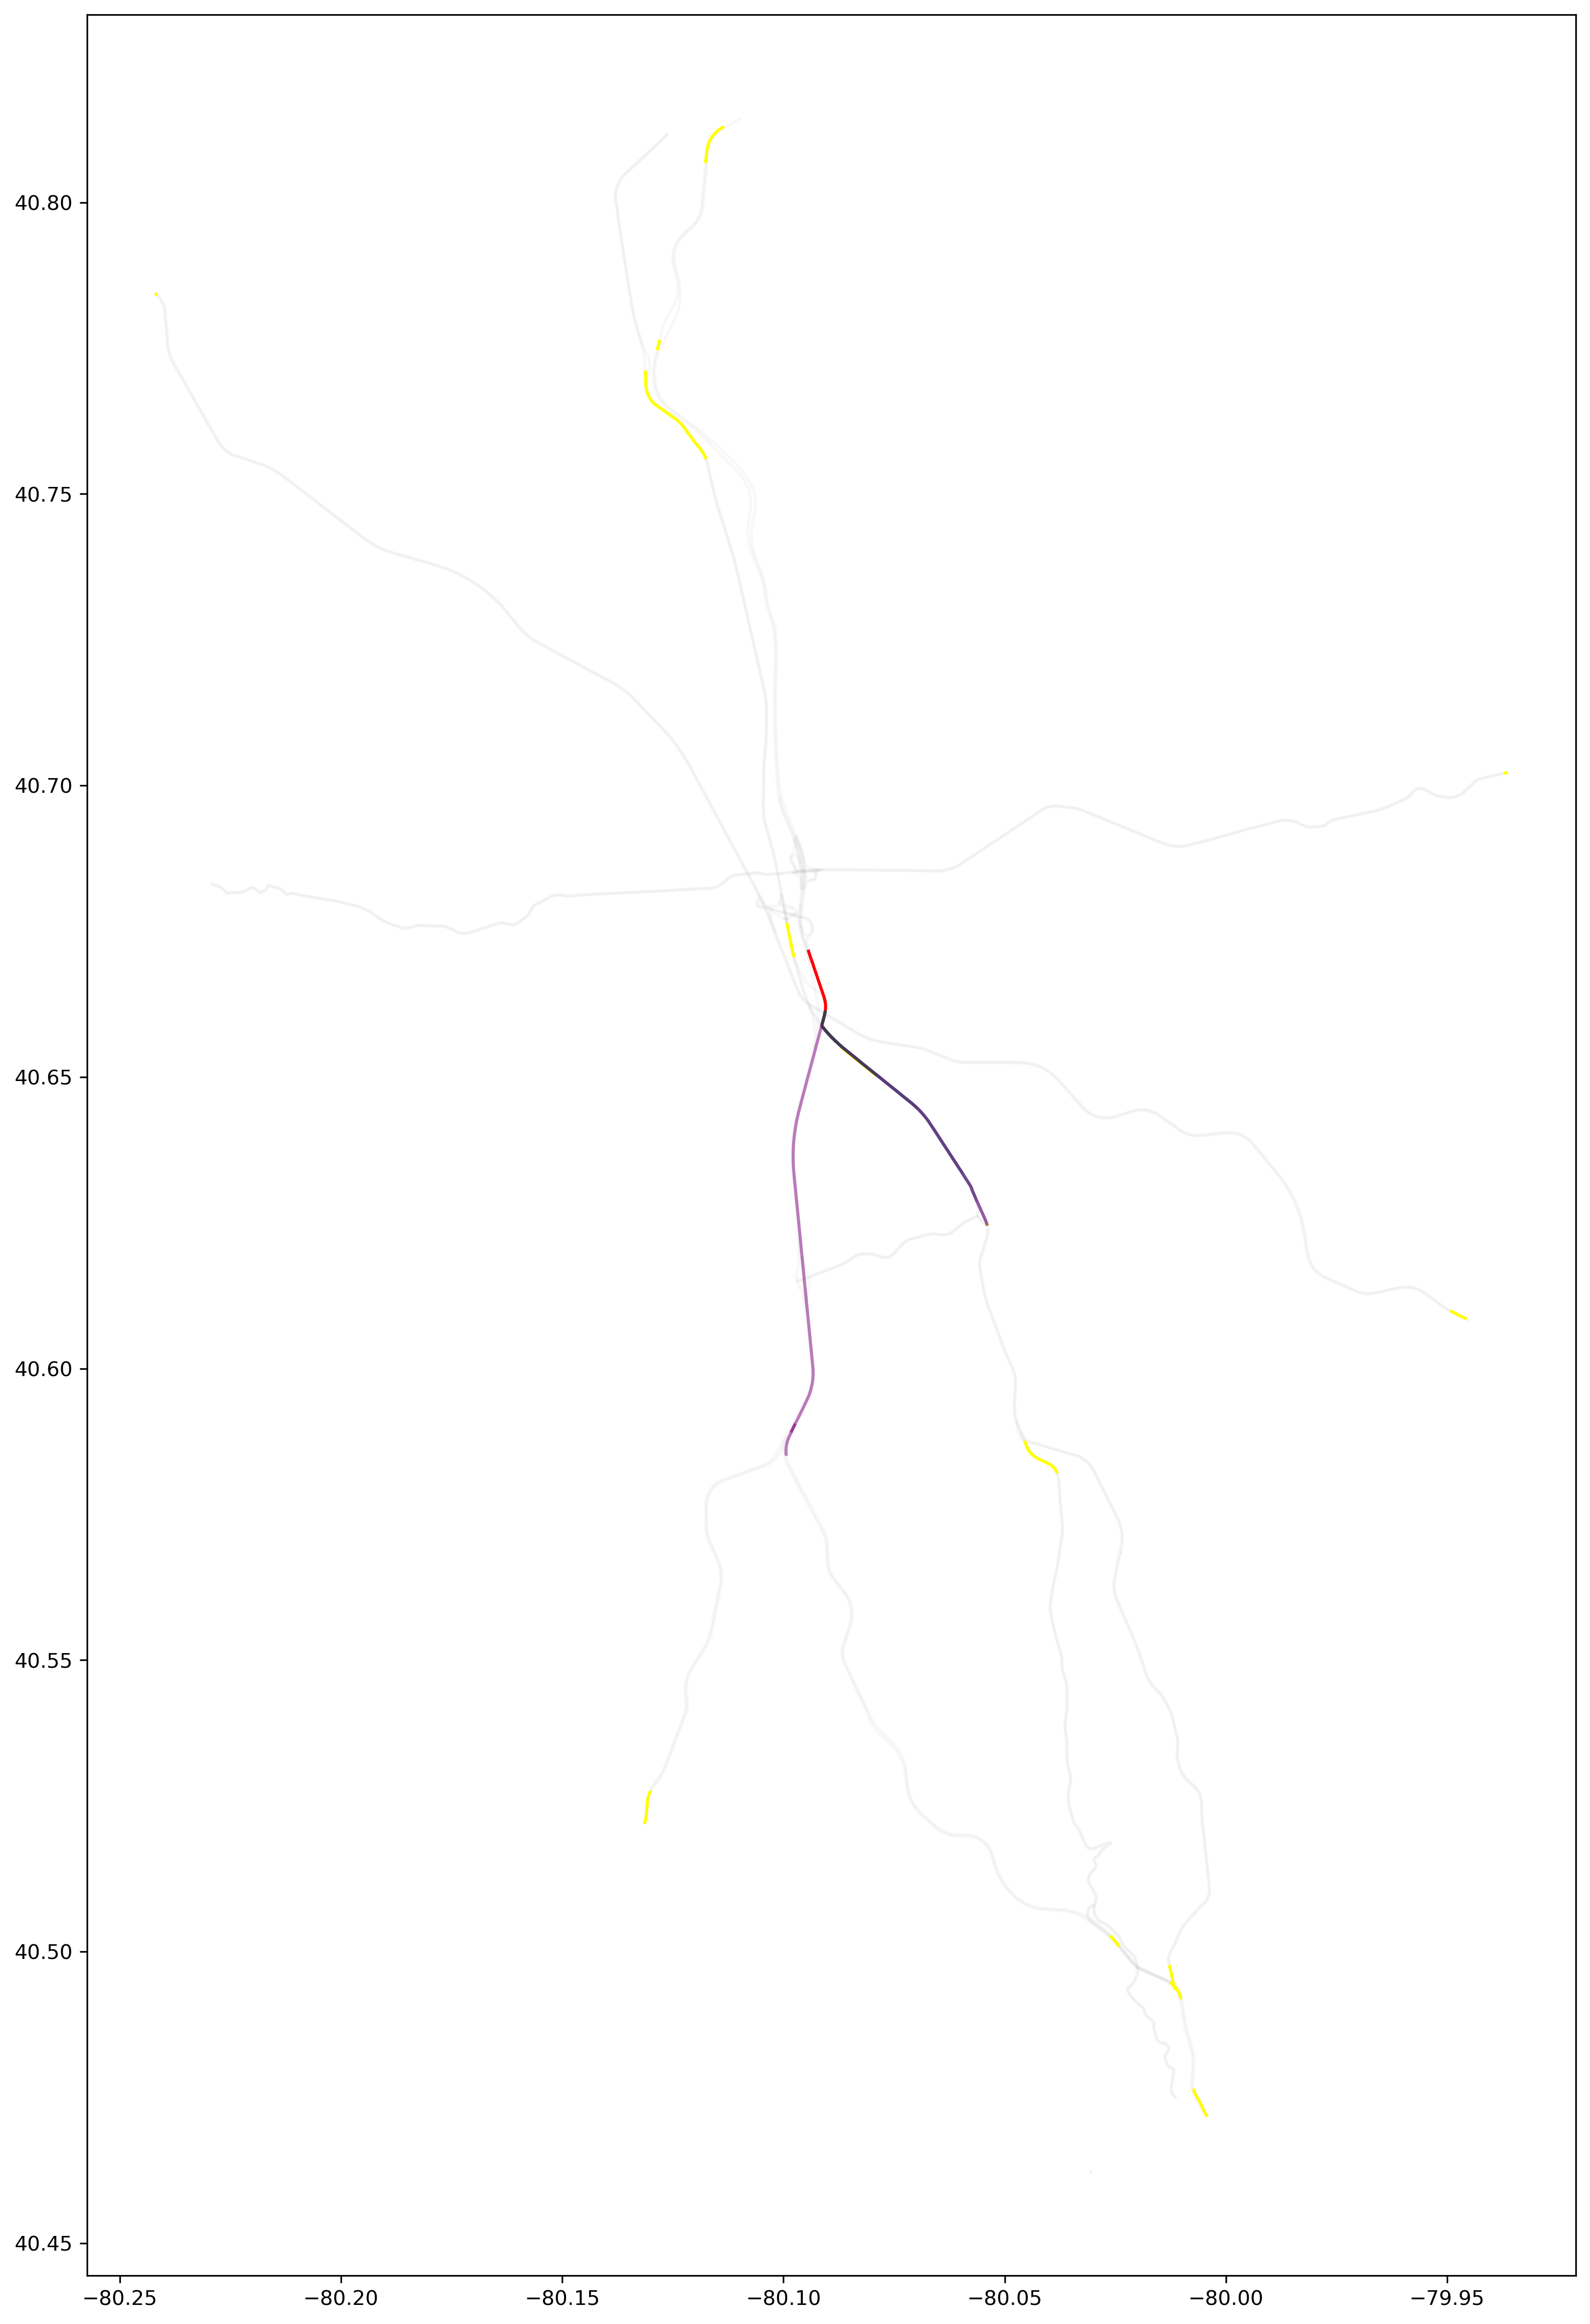

In [13]:
i = 3
check_curr_tmc = "104+11466" #list(set_tmc_segments_for_upstream)[i]

print("current tmc: ", check_curr_tmc)#, df_tmc_attr[df_tmc_attr.id_tmc == check_curr_tmc].direction)

check_upstream = dict_upstream_tmc[check_curr_tmc]
check_upstream_within_range = dict_upstream_tmc_5_miles[check_curr_tmc]

print("upstream within range: ", check_upstream_within_range)
fig, ax = plt.subplots(1,figsize=(30,20), dpi=300)
gdf_shp_tmc.plot(ax=ax, color="grey", alpha=0.05) # entire TMC segments in cranberry 
gdf_shp_tmc[(gdf_shp_tmc.id.isin(set_tmc_segments_for_upstream)) & (~gdf_shp_tmc.id.isin(dict_prev_tmc))].plot(ax=ax, color="yellow") # TMC segments without prev neighbors
gdf_shp_tmc[gdf_shp_tmc.id == check_curr_tmc].plot(ax=ax, color="red") # source
if len(check_upstream_within_range) > 1:
    print(f"MORE THAN ONE UPSTREAM PATH!!! There are {len(check_upstream_within_range)} upstream paths")
j = 0

# upstream segments within range
for k, u in enumerate(check_upstream_within_range[j]):
    gdf_shp_tmc[gdf_shp_tmc.id == u].plot(ax=ax, color="blue", alpha= (len(check_upstream_within_range[j])-k)/len(check_upstream_within_range[j]))  

# upstream segments 
for k, u in enumerate(check_upstream[j]):
    gdf_shp_tmc[gdf_shp_tmc.id == u].plot(ax=ax, color="green", alpha= (len(check_upstream[j])-k)/len(check_upstream[j]))  

# upstream unique segments
# gdf_shp_tmc[gdf_shp_tmc.id.isin(dict_upstream_unique_tmc[check_curr_tmc])].plot(ax=ax, color="purple", alpha=0.5) 
gdf_shp_tmc[gdf_shp_tmc.id.isin(dict_upstream_unique_tmc_5_miles[check_curr_tmc])].plot(ax=ax, color="purple", alpha=0.5)

current xd:  1310597390
MORE THAN ONE UPSTREAM PATH!!! There are 17 upstream paths


<AxesSubplot: >

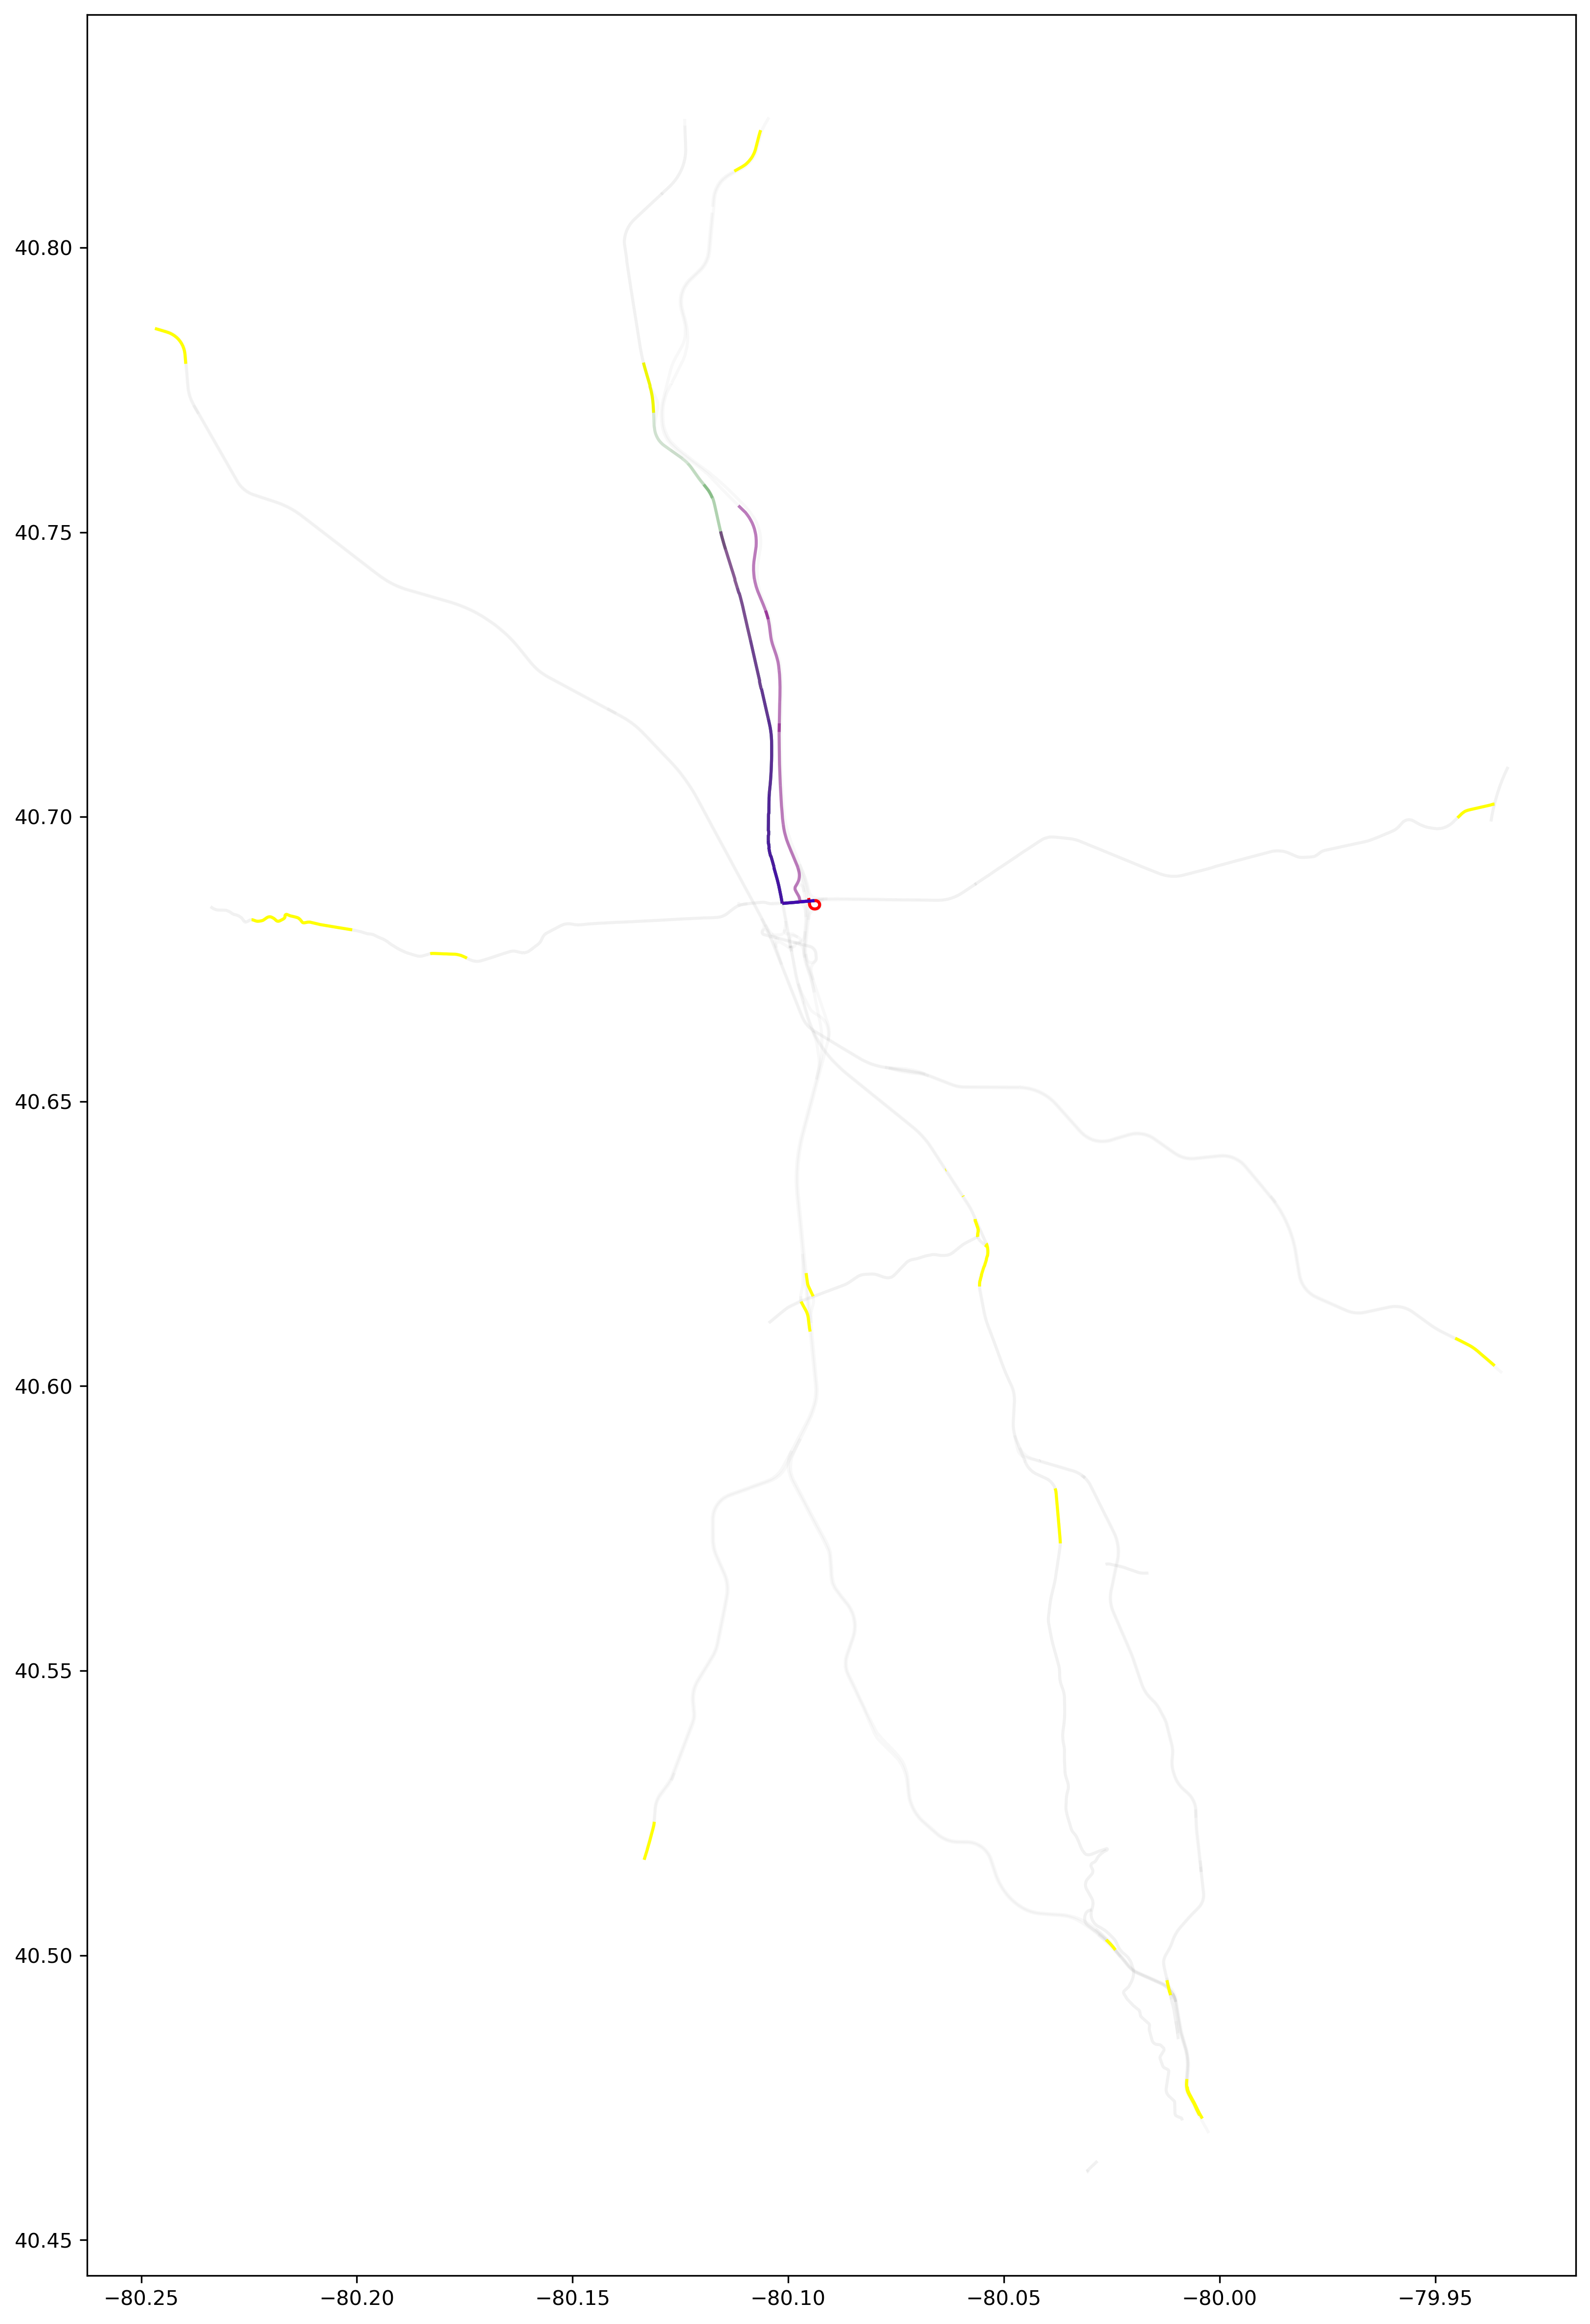

In [18]:
# Visualize and manually check upstream segments starting from each of 4 segments
i = 10
check_curr_xd = list(set_xd_segments_str_for_upstream)[i]
print("current xd: ", check_curr_xd)#, df_xd_attr[df_xd_attr.id_xd_str == check_curr_xd].Bearing)
check_upstream_xd = dict_upstream_xd_str[check_curr_xd]
check_upstream_xd_within_range = dict_upstream_xd_str_5_miles[check_curr_xd]

# print("upstream: ", check_upstream_xd)
fig, ax = plt.subplots(1,figsize=(30,20), dpi=300)
gdf_shp_xd.plot(ax=ax, color="grey", alpha=0.05) # entire XD segments in cranberry 
gdf_shp_xd[(gdf_shp_xd.id_xd_str.isin(set_xd_segments_str_for_upstream)) & (~gdf_shp_xd.id_xd_str.isin(dict_prev_xd))].plot(ax=ax, color="yellow") # TMC segments without prev neighbors
gdf_shp_xd[gdf_shp_xd.id_xd_str == check_curr_xd].plot(ax=ax, color="red") # source
if len(check_upstream_xd) > 1:
    print(f"MORE THAN ONE UPSTREAM PATH!!! There are {len(check_upstream_xd)} upstream paths")
j = 0
# upstream segments
for k, u in enumerate(check_upstream_xd[j]):
    gdf_shp_xd[gdf_shp_xd.id_xd_str == u].plot(ax=ax, color="green", alpha= (len(check_upstream_xd[j])-k)/len(check_upstream_xd[j]))  

# upstream segments within range
for k, u in enumerate(check_upstream_xd_within_range[j]):
    gdf_shp_xd[gdf_shp_xd.id_xd_str == u].plot(ax=ax, color="blue", alpha= (len(check_upstream_xd_within_range[j])-k)/len(check_upstream_xd_within_range[j]))  

# all upstream segments within range
gdf_shp_xd[gdf_shp_xd.id_xd_str.isin(dict_upstream_unique_xd_str_5_miles[check_curr_xd])].plot(ax=ax, color="purple", alpha=0.5) # 

In [4]:
df_tmc_attr = pd.read_csv("../../data/cranberry_tmc_5min/manually_select_cranberry_2019_dont_average_2/TMC_Identification.csv")
df_tmc_attr = df_tmc_attr.rename(columns={"tmc": "id_tmc", "miles":"miles_tmc"})


id_tmc       id_xd       prev_xd       next_xd  xd_start_lat  \
264  104-04439  1310569369  1.310271e+09  1.310271e+09      40.55586   
265  104-04439  1310270700  1.310271e+09  1.310569e+09      40.56387   
266  104-04439  1310270712  1.310271e+09  1.310271e+09      40.57162   
267  104-04439  1310270769  1.310271e+09  1.310271e+09      40.57955   
268  104-04439  1310270777  1.310271e+09  1.310271e+09      40.58291   
269  104-04439  1310356618           NaN  1.310357e+09      40.58864   
270  104-04439  1310270745  1.310545e+09  1.310271e+09      40.58864   

     xd_start_long  xd_end_lat  xd_end_long  tmc_start_lat  tmc_start_long  \
264      -80.11625    40.54852    -80.12094       40.58853        -80.0993   
265      -80.11424    40.55586    -80.11625       40.58853        -80.0993   
266      -80.11739    40.56387    -80.11424       40.58853        -80.0993   
267      -80.11622    40.57162    -80.11739       40.58853        -80.0993   
268      -80.10652    40.57955    -80.11622       40.58853        -80.0993   
269      -80.09920    40.58094    -80.09740       40.58853        -80.0993   
270      -80.09920    40.58291    -80.10652       40.58853        -80.0993   

     tmc_end_lat  tmc_end_long     angle  
264     40.55586     -80.11625  0.028643  
265     40.55586     -80.11625  0.074082  
266     40.55586     -80.11625  0.275226  
267     40.55586     -80.11625  0.105714  
268     40.55586     -80.11625  0.241516  
269     40.55586     -80.11625  0.225439  
270     40.55586     -80.11625  0.136251

In [21]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
...                    [3, 4, np.nan, 1],
...                    [np.nan, np.nan, np.nan, np.nan],
...                    [np.nan, 3, np.nan, 4]],
...                   columns=list("ABCD"))

In [20]:
df2 = pd.DataFrame([[2, np.nan, 0],
...                    [4, np.nan, 1],
...                    [np.nan, np.nan, np.nan],
...                    [3, np.nan, 4]],
...                   columns=list("ACD"))

In [47]:
df = pd.DataFrame(np.arange(15).reshape((3,5)), columns=["a", "b", "c", "d", "e"])

In [48]:
df

a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14

In [23]:
df_2 = df*3

In [24]:
df_2

a   b   c   d   e
0   0   3   6   9  12
1  15  18  21  24  27
2  30  33  36  39  42

In [27]:
df_2[["a", "c"]]

a   c
0   0   6
1  15  21
2  30  36

In [29]:
(df_2[df_2.index>0][["a", "c"]]>0).astype(float)

a    c
1  1.0  1.0
2  1.0  1.0

In [30]:
temp = (df_2[df_2.index>0][["a", "c"]]>0).astype(float)

In [31]:
temp

a    c
1  1.0  1.0
2  1.0  1.0

In [51]:
df[df.index>0][["a", "c"]]

a   c
1   5   7
2  10  12

In [52]:
df[df.index>0][["a", "c"]].where(df[df.index>0][["a", "c"]] < temp+10, 1)

a  c
1   5  7
2  10  1

In [53]:
df.loc[df.index>0, ["a", "c"]] = df[df.index>0][["a", "c"]].where(df[df.index>0][["a", "c"]] < temp+10, 1)

In [54]:
df

a   b  c   d   e
0   0   1  2   3   4
1   5   6  7   8   9
2  10  11  1  13  14

In [58]:
condition = (df.index//2==0) & (df.index < 1)

In [59]:
df.loc[condition, ["a", "d"]]

a  d
0  0  3

In [36]:
df[df.index>0][["a", "c"]]

a   c
1   5   7
2  10  12

In [40]:
df

a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14

In [22]:
df

A    B   C    D
0  NaN  2.0 NaN  0.0
1  3.0  4.0 NaN  1.0
2  NaN  NaN NaN  NaN
3  NaN  3.0 NaN  4.0

In [23]:
df2

A   C    D
0  2.0 NaN  0.0
1  4.0 NaN  1.0
2  NaN NaN  NaN
3  3.0 NaN  4.0

In [25]:
df[["A"]] - df2[["A"]]

A
0  NaN
1 -1.0
2  NaN
3  NaN

In [8]:
df[["A", "B"]].mean(axis=1)

0    2.0
1    3.5
2    NaN
3    3.0
dtype: float64

In [5]:
df["A"]

0    NaN
1    3.0
2    NaN
3    NaN
Name: A, dtype: float64

In [6]:
temp = pd.Series([1,2,3,4])

In [9]:
df["A"].fillna(df[["A", "B"]].mean(axis=1))

0    2.0
1    3.0
2    NaN
3    3.0
Name: A, dtype: float64

In [14]:
df["A"].fillna(df["C"])

0    NaN
1    3.0
2    NaN
3    NaN
Name: A, dtype: float64

In [39]:
y = np.load("./data/new_Y_v2.npy")

In [40]:
y.shape

(21060, 75, 2)

In [4]:
a = np.arange(24).reshape(6,4)
b = [0, 2]

In [7]:
c = a.reshape(3,2,4)

In [8]:
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [9]:
c[b, :, :]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [9]:
tmc_xd_join = pd.read_csv("./data/tmc_xd_join.csv").dropna(subset={"XDSegID"})  # contains all new_out_tmc and new_in_tmc
tmc_xd_join.XDSegID = tmc_xd_join.XDSegID.apply(int).apply(str)
tmc_xd_join = tmc_xd_join.rename(columns={"id":"id_tmc", "XDSegID":"id_xd"})

In [16]:
tmc_xd_join

id_tmc  OID       id_xd    PreviousXD    NextXDSegI  FRC  RoadNumber  \
0     104P06676  NaN   388051958           NaN           NaN  0.0       228.0   
1     104P06676  NaN   429090769  1.310324e+09  1.310291e+09  0.0       228.0   
2     104P06676  NaN  1310323857  1.310598e+09  4.290908e+08  0.0       228.0   
3     104P06676  NaN  1310330692           NaN  1.310331e+09  0.0         NaN   
4     104P06676  NaN  1310334146  1.310597e+09  1.310323e+09  0.0         NaN   
...         ...  ...         ...           ...           ...  ...         ...   
1439  104+09201  NaN  1310398365  1.310321e+09  1.310254e+09  1.0        19.0   
1440  104+09201  NaN  1310514659  1.310346e+09  4.290913e+08  2.0         NaN   
1441  104+09201  NaN  1310514675  4.290913e+08  1.310346e+09  2.0         NaN   
1442  104+09201  NaN  1310607155           NaN  1.310414e+09  3.0         NaN   
1443  104+09201  NaN  1310607230  1.310414e+09           NaN  3.0         NaN   

           RoadName  LinearID        Country  ... SlipRoad SpecialRoa  \
0            PA 228       NaN  United States  ...      0.0        NaN   
1            PA 228       NaN  United States  ...      0.0        NaN   
2            PA 228       NaN  United States  ...      0.0        NaN   
3               NaN       NaN  United States  ...      1.0        NaN   
4               NaN       NaN  United States  ...      1.0        NaN   
...             ...       ...            ...  ...      ...        ...   
1439          US 19       NaN  United States  ...      0.0        NaN   
1440   Ingomar Road       NaN  United States  ...      0.0        NaN   
1441   Ingomar Road       NaN  United States  ...      0.0        NaN   
1442  Highland Road       NaN  United States  ...      0.0        NaN   
1443  Highland Road       NaN  United States  ...      0.0        NaN   

                             RoadList  StartLat  StartLong    EndLat  \
0                              PA 228  40.68528  -80.09392  40.68540   
1                              PA 228  40.68540  -80.09267  40.68543   
2                              PA 228  40.68528  -80.09392  40.68540   
3                                 NaN  40.68480  -80.09259  40.68540   
4                                 NaN  40.68677  -80.09629  40.68241   
...                               ...       ...        ...       ...   
1439                            US 19  40.56355  -80.03885  40.55419   
1440                     Ingomar Road  40.58203  -80.03812  40.58347   
1441                     Ingomar Road  40.58347  -80.03268  40.58203   
1442  Old Perry Highway,Highland Road  40.56108  -80.03940  40.56617   
1443  Highland Road,Old Perry Highway  40.56617  -80.04335  40.56108   

       EndLong Bearing    XDGroup  ShapeSRID  
0    -80.09267       E  1970621.0     4326.0  
1    -80.09180       E   514061.0     4326.0  
2    -80.09267       E   514061.0     4326.0  
3    -80.09267       N  3461167.0     4326.0  
4    -80.09592       S  3463008.0     4326.0  
...        ...     ...        ...        ...  
1439 -80.03847       S   531444.0     4326.0  
1440 -80.03268       E   520633.0     4326.0  
1441 -80.03812       W  2507086.0     4326.0  
1442 -80.04335       N  3484122.0     4326.0  
1443 -80.03940       S  3484089.0     4326.0  

[1415 rows x 25 columns]

In [11]:
tmc_xd_join.to_csv("./data/tmc_xd_join.csv", index=False)

In [102]:
tmc_xd_join = pd.read_csv("./data/tmc_xd_join.csv")

In [104]:
tmc_xd_join.head(5)

id_tmc  OID       id_xd    PreviousXD    NextXDSegI  FRC  RoadNumber  \
0  104P06676  NaN   388051958           NaN           NaN  0.0       228.0   
1  104P06676  NaN   429090769  1.310324e+09  1.310291e+09  0.0       228.0   
2  104P06676  NaN  1310323857  1.310598e+09  4.290908e+08  0.0       228.0   
3  104P06676  NaN  1310330692           NaN  1.310331e+09  0.0         NaN   
4  104P06676  NaN  1310334146  1.310597e+09  1.310323e+09  0.0         NaN   

  RoadName  LinearID        Country  ... SlipRoad SpecialRoa RoadList  \
0   PA 228       NaN  United States  ...      0.0        NaN   PA 228   
1   PA 228       NaN  United States  ...      0.0        NaN   PA 228   
2   PA 228       NaN  United States  ...      0.0        NaN   PA 228   
3      NaN       NaN  United States  ...      1.0        NaN      NaN   
4      NaN       NaN  United States  ...      1.0        NaN      NaN   

   StartLat  StartLong    EndLat   EndLong Bearing    XDGroup  ShapeSRID  
0  40.68528  -80.09392  40.68540 -80.09267       E  1970621.0     4326.0  
1  40.68540  -80.09267  40.68543 -80.09180       E   514061.0     4326.0  
2  40.68528  -80.09392  40.68540 -80.09267       E   514061.0     4326.0  
3  40.68480  -80.09259  40.68540 -80.09267       N  3461167.0     4326.0  
4  40.68677  -80.09629  40.68241 -80.09592       S  3463008.0     4326.0  

[5 rows x 25 columns]

In [105]:
tmc_to_xd = tmc_xd_join[["id_tmc", "id_xd"]]

In [106]:
tmc_to_xd

id_tmc       id_xd
0     104P06676   388051958
1     104P06676   429090769
2     104P06676  1310323857
3     104P06676  1310330692
4     104P06676  1310334146
...         ...         ...
1410  104+09201  1310398365
1411  104+09201  1310514659
1412  104+09201  1310514675
1413  104+09201  1310607155
1414  104+09201  1310607230

[1415 rows x 2 columns]

In [51]:
xd_attr = pd.read_csv("./data/shapefiles/xd_attr.csv")
xd_attr.XDSegID = xd_attr.XDSegID.apply(int).apply(str)
xd_attr.PreviousXD = xd_attr.PreviousXD.apply(lambda x: str(int(x)) if not np.isnan(x) else x)
xd_attr.NextXDSegI = xd_attr.NextXDSegI.apply(lambda x: str(int(x)) if not np.isnan(x) else x)
xd_attr = xd_attr.rename(columns={"XDSegID":"id_xd", "PreviousXD":"id_xd_prev", "NextXDSegI":"id_xd_next", "Miles":"miles_xd"})

/var/folders/y2/1kk0np3x01qchz21plxx_m0w0000gn/T/ipykernel_57755/2537207207.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  xd_attr = pd.read_csv("./data/shapefiles/xd_attr.csv")


In [52]:
xd_attr.columns

Index(['OID', 'id_xd', 'id_xd_prev', 'id_xd_next', 'FRC', 'RoadNumber',
       'RoadName', 'LinearID', 'Country', 'State', 'County', 'District',
       'miles_xd', 'Lanes', 'SlipRoad', 'SpecialRoa', 'RoadList', 'StartLat',
       'StartLong', 'EndLat', 'EndLong', 'Bearing', 'XDGroup', 'ShapeSRID'],
      dtype='object')

In [53]:
xd_attr

OID       id_xd  id_xd_prev  id_xd_next  FRC  RoadNumber  \
0       NaN   128218004  1282656647  1282656526    1        62.0   
1       NaN   128214080   129362453   129006856    3         NaN   
2       NaN   128244210   429512463   429524197    1        62.0   
3       NaN   128243311         NaN  1282847122    4         NaN   
4       NaN   128247637         NaN         NaN    4         NaN   
...     ...         ...         ...         ...  ...         ...   
117674  NaN  1310618675  1310390374   389122055    1         NaN   
117675  NaN  1310618793  1310618797  1310618559    2       403.0   
117676  NaN  1310618797  1310418378  1310618793    2       403.0   
117677  NaN  1310618822         NaN         NaN    4         NaN   
117678  NaN  1310618877   429120796         NaN    1        53.0   

                      RoadName  LinearID        Country         State  ...  \
0                        US 62       NaN  United States  Pennsylvania  ...   
1               Hickory Bridge       NaN  United States  Pennsylvania  ...   
2                        US 62       NaN  United States  Pennsylvania  ...   
3                  Glen Avenue       NaN  United States  Pennsylvania  ...   
4       West Washington Street       NaN  United States  Pennsylvania  ...   
...                        ...       ...            ...           ...  ...   
117674      East Orange Street       NaN  United States  Pennsylvania  ...   
117675                  PA 403       NaN  United States  Pennsylvania  ...   
117676                  PA 403       NaN  United States  Pennsylvania  ...   
117677                     NaN       NaN  United States  Pennsylvania  ...   
117678                   PA 53       NaN  United States  Pennsylvania  ...   

       SlipRoad SpecialRoa                     RoadList  StartLat  StartLong  \
0             0        NaN                        US 62  41.82235  -79.26444   
1             0        NaN               Hickory Bridge  41.84497  -79.14943   
2             0        NaN                        US 62  41.84243  -79.25704   
3             0        NaN                  Glen Avenue  39.96943  -75.56340   
4             0        NaN       West Washington Street  40.61122  -75.48515   
...         ...        ...                          ...       ...        ...   
117674        0        NaN    PA 462,East Orange Street  40.04001  -76.28734   
117675        0        NaN                       PA 403  40.28836  -78.91395   
117676        0        NaN                       PA 403  40.28616  -78.91973   
117677        0        NaN                          NaN  40.79099  -76.53468   
117678        0        NaN  PA 53,PA 53;Historic US 322  40.90198  -78.22515   

          EndLat   EndLong  Bearing  XDGroup  ShapeSRID  
0       41.81502 -79.27155        S   266075       4326  
1       41.84303 -79.15024        S   265976       4326  
2       41.83915 -79.25184        E   266075       4326  
3       39.96953 -75.56338        N   266914       4326  
4       40.61137 -75.48460        E   267041       4326  
...          ...       ...      ...      ...        ...  
117674  40.03976 -76.30393        W  2008848       4326  
117675  40.29468 -78.91671        N  2010740       4326  
117676  40.28836 -78.91395        E  2010740       4326  
117677  40.79094 -76.53272        E  3625732       4326  
117678  40.89704 -78.22108        S  2520981       4326  

[117679 rows x 24 columns]

In [54]:
xd_attr.to_csv("./data/shapefiles/xd_attr.csv", index=False)

In [58]:
xd_attr.loc[:,["id_xd", "id_xd_prev", "id_xd_next", "miles_xd"]]

id_xd  id_xd_prev  id_xd_next  miles_xd
0        128218004  1282656647  1282656526  0.628703
1        128214080   129362453   129006856  0.141113
2        128244210   429512463   429524197  0.356400
3        128243311         NaN  1282847122  0.006618
4        128247637         NaN         NaN  0.030839
...            ...         ...         ...       ...
117674  1310618675  1310390374   389122055  0.971595
117675  1310618793  1310618797  1310618559  0.649072
117676  1310618797  1310418378  1310618793  0.700093
117677  1310618822         NaN         NaN  0.102943
117678  1310618877   429120796         NaN  0.404351

[117679 rows x 4 columns]

In [60]:
core_xd_attr = xd_attr.loc[:,["id_xd", "id_xd_prev", "id_xd_next", "miles_xd"]]
core_xd_attr = core_xd_attr.set_index(keys="id_xd")

In [61]:
core_xd_attr

id_xd_prev  id_xd_next  miles_xd
id_xd                                       
128218004   1282656647  1282656526  0.628703
128214080    129362453   129006856  0.141113
128244210    429512463   429524197  0.356400
128243311          NaN  1282847122  0.006618
128247637          NaN         NaN  0.030839
...                ...         ...       ...
1310618675  1310390374   389122055  0.971595
1310618793  1310618797  1310618559  0.649072
1310618797  1310418378  1310618793  0.700093
1310618822         NaN         NaN  0.102943
1310618877   429120796         NaN  0.404351

[117679 rows x 3 columns]

In [64]:
core_xd_attr.to_csv("./data/shapefiles/core_xd_attr.csv")

In [66]:
dict_xd_attr = core_xd_attr.to_dict(orient="index")  # key: <id_xd>; value: dict() with keys: 'id_xd_prev', 'id_xd_next', 'miles_xd'

In [92]:
str(dict_xd_attr["128243311"]['id_xd_prev'])

'nan'

In [68]:
next_xd = {}

In [94]:
for xd in tqdm(dict_xd_attr):
    dist = 5 # 5 miles
    curr = xd
    nxt = dict_xd_attr[curr]['id_xd_next']
    next_list = []
    while dist >= 0 and str(nxt) != "nan":
        next_list.append(nxt)
        if nxt not in dict_xd_attr:
            break
        else:
            dist -= dict_xd_attr[nxt]["miles_xd"]
            nxt = dict_xd_attr[nxt]['id_xd_next']
    next_xd[xd] = next_list

100%|██████████| 117679/117679 [00:00<00:00, 183256.67it/s]


In [ ]:
next_xd

In [97]:
with open("./data/next_xd.pkl", "wb") as f:
    pickle.dump(next_xd, f)

In [99]:
with open("./data/next_xd.pkl", "rb") as f:
    temp = pickle.load(f)

In [100]:
temp

{'128218004': ['1282656526',
  '1282656568',
  '1282656798',
  '1282656835',
  '387477309',
  '429524193',
  '429524194',
  '429524195'],
 '128214080': ['129006856', '1282696696'],
 '128244210': ['429524197',
  '429540393',
  '429524192',
  '1282656606',
  '1282656647',
  '128218004',
  '1282656526',
  '1282656568',
  '1282656798',
  '1282656835',
  '387477309'],
 '128243311': ['1282847122',
  '1282639653',
  '387520623',
  '1282662727',
  '1282561856',
  '1282561970',
  '387586574',
  '1282645373',
  '1282658954',
  '429519260',
  '1282785833',
  '1282645354'],
 '128247637': [],
 '128249378': ['1282693275'],
 '128249379': ['128249378', '1282693275'],
 '128249487': [],
 '128256044': [],
 '128264215': ['1282807901', '1282758647', '1282628412', '1282572680'],
 '128264355': ['1282645740', '1282767620', '1282740563'],
 '128266250': [],
 '128267870': ['129192777', '1282816566'],
 '128274683': [],
 '128274595': ['1282845829',
  '1282731849',
  '1282579564',
  '1282731940',
  '387516067',
  '

In [64]:
thres_accu_recall = np.load("/Users/haowu/Desktop/Transportation Research/Traffic Prediction/inference/thres_accu_recall.npy")

In [65]:
thres_accu_recall

array([[0.        , 0.05      , 0.1       , 0.15      , 0.2       ,
        0.25      , 0.3       , 0.35      , 0.4       , 0.45      ,
        0.5       , 0.55      , 0.6       , 0.65      , 0.7       ,
        0.75      , 0.8       , 0.85      , 0.9       , 0.95      ],
       [0.02645672, 0.02645672, 0.02645672, 0.02645672, 0.02645672,
        0.02645672, 0.02645672, 0.02645672, 0.02645672, 0.02645672,
        0.02645672, 0.02645781, 0.02692439, 0.06543814, 0.92280233,
        0.97354329, 0.97354329, 0.97354329, 0.97354329, 0.97354329],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99969095, 0.97034568, 0.08032496,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [41]:
waze_out = np.load("./data/waze_out_tmc.npy")

In [55]:
time_idx = 23*180+129
seg_idx = 18

waze_out[27*180: 28*180, seg_idx]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
a = np.arange(24).reshape(4,3,2)

In [57]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [62]:
np.stack([a]*3, axis=-1)

array([[[[ 0,  0,  0],
         [ 1,  1,  1]],

        [[ 2,  2,  2],
         [ 3,  3,  3]],

        [[ 4,  4,  4],
         [ 5,  5,  5]]],


       [[[ 6,  6,  6],
         [ 7,  7,  7]],

        [[ 8,  8,  8],
         [ 9,  9,  9]],

        [[10, 10, 10],
         [11, 11, 11]]],


       [[[12, 12, 12],
         [13, 13, 13]],

        [[14, 14, 14],
         [15, 15, 15]],

        [[16, 16, 16],
         [17, 17, 17]]],


       [[[18, 18, 18],
         [19, 19, 19]],

        [[20, 20, 20],
         [21, 21, 21]],

        [[22, 22, 22],
         [23, 23, 23]]]])

In [58]:
b = np.ones([4,3,2])

In [60]:
a * (b < 1)

array([[[0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0]]])

In [40]:
np.mean(b[:2], axis=0)

array([[3., 4.],
       [5., 6.],
       [7., 8.]])

In [17]:
t = torch.arange(24).view(4,3,2)

In [22]:
t/t

tensor([[[nan, 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [21]:
t.sum(axis=0).sum(axis=1)

tensor([ 76,  92, 108])

In [23]:
temp = np.arange(24).reshape(6,2,2)

In [24]:
b = temp * 2

In [25]:
b

array([[[ 0,  2],
        [ 4,  6]],

       [[ 8, 10],
        [12, 14]],

       [[16, 18],
        [20, 22]],

       [[24, 26],
        [28, 30]],

       [[32, 34],
        [36, 38]],

       [[40, 42],
        [44, 46]]])

In [27]:
np.maximum(np.abs(temp), np.abs(b))

array([[[ 0,  2],
        [ 4,  6]],

       [[ 8, 10],
        [12, 14]],

       [[16, 18],
        [20, 22]],

       [[24, 26],
        [28, 30]],

       [[32, 34],
        [36, 38]],

       [[40, 42],
        [44, 46]]])

In [29]:
temp[0,0,0] = 1

In [30]:
(temp-b)/b

/var/folders/1s/gdw_sfh525x0796jh_nnmx6r0000gn/T/ipykernel_43377/826103142.py:1: RuntimeWarning: divide by zero encountered in true_divide
  (temp-b)/b


array([[[ inf, -0.5],
        [-0.5, -0.5]],

       [[-0.5, -0.5],
        [-0.5, -0.5]],

       [[-0.5, -0.5],
        [-0.5, -0.5]],

       [[-0.5, -0.5],
        [-0.5, -0.5]],

       [[-0.5, -0.5],
        [-0.5, -0.5]],

       [[-0.5, -0.5],
        [-0.5, -0.5]]])

In [87]:
def assign_id(dataframe,lon_var,lat_var,shapefile,id_str):
    ddf = dataframe.copy()
    local_gdf = gpd.GeoDataFrame(
            ddf, crs={'init': 'epsg:4326'},
            geometry=[Point(xy) for xy in
                              zip(dataframe[lon_var], dataframe[lat_var])])
    local_gdf = gpd.sjoin(
            local_gdf, shapefile, how='left', op='within')
    return local_gdf[id_str]

def build_tmc_dict(net):
    tmc2edge = { }
    for key in net.edges:
        tmc_id = net.edges[key]['id']
        if tmc_id not in tmc2edge:
            tmc2edge[tmc_id] = [ ]
        tmc2edge[tmc_id].append(key)
    return tmc2edge

def build_waze_incident_matrix(waze, buffer_shp, tmc_header, matrix=None):
    affected_tmcs_df = assign_id(waze, 'x','y',buffer_shp,'id')
    min_date = datetime.date(2019, 2, 10)
    max_date = datetime.date(2019, 7, 24)
    n_days = (max_date-min_date).days+1
    n_ts_per_day = 288
    if matrix is None:
        matrix = np.zeros((n_days*n_ts_per_day, len(tmc_header)))
    n_incidents = len(waze)
    for i in tqdm(range(n_incidents)):
        record = waze.iloc[i]
        start_date = (record.DateTimeEventOccurs.date()-min_date).days
        end_date   = (record.ActualDateTimeOpened.date()-min_date).days
        start_ts = record.DateTimeEventOccurs.hour*12 + record.DateTimeEventOccurs.minute//5
        end_ts  = record.ActualDateTimeOpened.hour*12 + record.ActualDateTimeOpened.minute//5+1
        # select tmcs
        tmc_ids = np.unique(np.array(affected_tmcs_df.loc[i]))
        indices = np.isin(tmc_header, tmc_ids)
        # matrix index
        start_index = max(start_date*n_ts_per_day + start_ts,0)
        end_index =   max(end_date*n_ts_per_day + end_ts,0)
        matrix[start_index:end_index][:,indices] = 1
    return matrix

def fill_tmcs_by_spatial_distance(mat, tmc_header, tmc2edge):
    print('filling waze points with spatial distance...',end='')
    for row in tqdm(mat):
        sel_tmcs = tmc_header[row > 0]
        if len(sel_tmcs) > 1:
            for (bgn_tmc, end_tmc) in permutations(sel_tmcs, 2):
                bgn_node, end_node = tmc2edge[bgn_tmc][0][1], tmc2edge[end_tmc][0][0]
                if nx.has_path(net, end_node, bgn_node):
                    ns = nx.shortest_path(net, end_node, bgn_node)
                    n_nodes = len(ns)
                    if n_nodes == 4:
                        filled_tmc_id = net.edges[ns[1],ns[2]]['id']
                        column_idx = np.where(tmc_header == filled_tmc_id)[0]
                        row[column_idx] = 1
    print('done!')
    return mat

In [88]:
waze = pd.read_pickle('./data/waze_vis.pickle').reset_index(drop=True)
waze = waze[waze.type.isin(['ACCIDENT','JAM'])].reset_index(drop=True)
shp = gpd.read_file('./data/shapefile/cranberry.shp', SHAPE_RESTORE_SHX=True)
net = nx.read_shp('./data/shapefile/cranberry.shp', simplify=True)
tmc2edge = build_tmc_dict(net)

/var/folders/1s/gdw_sfh525x0796jh_nnmx6r0000gn/T/ipykernel_56491/3403020948.py:4: DeprecationWarning: read_shp is deprecated and will be removed in 3.0.See https://networkx.org/documentation/latest/auto_examples/index.html#geospatial.
  net = nx.read_shp('./data/shapefile/cranberry.shp', simplify=True)


In [89]:
road_buffer_shp = shp.to_crs(epsg=3857).buffer(8,resolution=1).to_crs(epsg=4326)
shp['buffer'] = road_buffer_shp
buffer_shp = shp[['id','buffer']]
buffer_shp.columns = ['id','geometry']
# buffer_shp = gpd.GeoDataFrame(buffer_shp,crs={'init': 'epsg:4326'})
buffer_shp = gpd.GeoDataFrame(buffer_shp).to_crs(epsg=4326)
tmc_ids = np.sort(buffer_shp.id.unique())
print(buffer_shp)

            id                                           geometry
0    104P06676  POLYGON ((-80.09267 40.68534, -80.09273 40.685...
1    104P06676  POLYGON ((-80.09448 40.68523, -80.09472 40.685...
2    104N06676  POLYGON ((-80.09602 40.68540, -80.09601 40.685...
3    104P04742  POLYGON ((-80.10031 40.68113, -80.09998 40.679...
4    104P11608  POLYGON ((-80.09594 40.68269, -80.09594 40.683...
..         ...                                                ...
326  104+09197  POLYGON ((-80.03124 40.51800, -80.03101 40.517...
327  104+09198  POLYGON ((-80.03551 40.52553, -80.03544 40.525...
328  104+09199  POLYGON ((-80.03584 40.54413, -80.03584 40.544...
329  104+09200  POLYGON ((-80.03947 40.56039, -80.03951 40.560...
330  104+09201  POLYGON ((-80.03791 40.58169, -80.03791 40.581...

[331 rows x 2 columns]


In [90]:
mat = build_waze_incident_matrix(waze, buffer_shp, tmc_ids)

/opt/anaconda3/envs/traffic/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/1s/gdw_sfh525x0796jh_nnmx6r0000gn/T/ipykernel_56491/447766416.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  mat = build_waze_incident_matrix(waze, buffer_shp, tmc_ids)
/var/folders/1s/gdw_sfh525x0796jh_nnmx6r0000gn/T/ipykernel_56491/369826282.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:432

In [91]:
mat.shape

(47520, 315)

In [92]:
mat = fill_tmcs_by_spatial_distance(mat, tmc_ids, tmc2edge)

filling waze points with spatial distance...

100%|██████████| 47520/47520 [00:43<00:00, 1083.49it/s]

done!


In [93]:
mat.shape

(47520, 315)

In [96]:
time_slot = pd.date_range(start='02/10/2019 ', end="07/25/2019", inclusive="left",freq="5min")

In [97]:
time_slot

DatetimeIndex(['2019-02-10 00:00:00', '2019-02-10 00:05:00',
               '2019-02-10 00:10:00', '2019-02-10 00:15:00',
               '2019-02-10 00:20:00', '2019-02-10 00:25:00',
               '2019-02-10 00:30:00', '2019-02-10 00:35:00',
               '2019-02-10 00:40:00', '2019-02-10 00:45:00',
               ...
               '2019-07-24 23:10:00', '2019-07-24 23:15:00',
               '2019-07-24 23:20:00', '2019-07-24 23:25:00',
               '2019-07-24 23:30:00', '2019-07-24 23:35:00',
               '2019-07-24 23:40:00', '2019-07-24 23:45:00',
               '2019-07-24 23:50:00', '2019-07-24 23:55:00'],
              dtype='datetime64[ns]', length=47520, freq='5T')

In [98]:
waze_df = pd.DataFrame(data=mat, columns=tmc_ids, index=time_slot)

In [99]:
waze_df

104+04438  104+04439  104+04440  104+04441  104+04442  \
2019-02-10 00:00:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:05:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:10:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:15:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:20:00        0.0        0.0        0.0        0.0        0.0   
...                        ...        ...        ...        ...        ...   
2019-07-24 23:35:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:40:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:45:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:50:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:55:00        0.0        0.0        0.0        0.0        0.0   

                     104+04443  104+04444  104+04445  104+04528  104+04529  \
2019-02-10 00:00:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:05:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:10:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:15:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:20:00        0.0        0.0        0.0        0.0        0.0   
...                        ...        ...        ...        ...        ...   
2019-07-24 23:35:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:40:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:45:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:50:00        0.0        0.0        0.0        0.0        0.0   
2019-07-24 23:55:00        0.0        0.0        0.0        0.0        0.0   

                     ...  1310574747  1310574829  1310583799  1310593380  \
2019-02-10 00:00:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:05:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:10:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:15:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:20:00  ...         0.0         0.0         0.0         0.0   
...                  ...         ...         ...         ...         ...   
2019-07-24 23:35:00  ...         0.0         0.0         0.0         0.0   
2019-07-24 23:40:00  ...         0.0         0.0         0.0         0.0   
2019-07-24 23:45:00  ...         0.0         0.0         0.0         0.0   
2019-07-24 23:50:00  ...         0.0         0.0         0.0         0.0   
2019-07-24 23:55:00  ...         0.0         0.0         0.0         0.0   

                     1310597255  1310597366  1310597390  1310597496  \
2019-02-10 00:00:00         0.0         0.0         0.0         0.0   
2019-02-10 00:05:00         0.0         0.0         0.0         0.0   
2019-02-10 00:10:00         0.0         0.0         0.0         0.0   
2019-02-10 00:15:00         0.0         0.0         0.0         0.0   
2019-02-10 00:20:00         0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
2019-07-24 23:35:00         0.0         0.0         0.0         0.0   
2019-07-24 23:40:00         0.0         0.0         0.0         0.0   
2019-07-24 23:45:00         0.0         0.0         0.0         0.0   
2019-07-24 23:50:00         0.0         0.0         0.0         0.0   
2019-07-24 23:55:00         0.0         0.0         0.0         0.0   

                     1310597520  389134964  
2019-02-10 00:00:00         0.0        0.0  
2019-02-10 00:05:00         0.0        0.0  
2019-02-10 00:10:00         0.0        0.0  
2019-02-10 00:15:00         0.0        0.0  
2019-02-10 00:20:00         0.0        0.0  
...                         ...        ...  
2019-07-24 23:35:00         0.0        0.0  
2019-07-24 23:40:00  

In [100]:
waze_df.to_pickle("./data/waze_df.pickle")

In [74]:
temp = pd.read_pickle("./data/waze_df.pickle")

In [75]:
temp

104+04438  104+04439  104+04440  104+04441  104+04442  \
2019-02-10 00:00:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:05:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:10:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:15:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:20:00        0.0        0.0        0.0        0.0        0.0   
...                        ...        ...        ...        ...        ...   
2019-07-23 23:35:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:40:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:45:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:50:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:55:00        0.0        0.0        0.0        0.0        0.0   

                     104+04443  104+04444  104+04445  104+04528  104+04529  \
2019-02-10 00:00:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:05:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:10:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:15:00        0.0        0.0        0.0        0.0        0.0   
2019-02-10 00:20:00        0.0        0.0        0.0        0.0        0.0   
...                        ...        ...        ...        ...        ...   
2019-07-23 23:35:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:40:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:45:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:50:00        0.0        0.0        0.0        0.0        0.0   
2019-07-23 23:55:00        0.0        0.0        0.0        0.0        0.0   

                     ...  1310574747  1310574829  1310583799  1310593380  \
2019-02-10 00:00:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:05:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:10:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:15:00  ...         0.0         0.0         0.0         0.0   
2019-02-10 00:20:00  ...         0.0         0.0         0.0         0.0   
...                  ...         ...         ...         ...         ...   
2019-07-23 23:35:00  ...         0.0         0.0         0.0         0.0   
2019-07-23 23:40:00  ...         0.0         0.0         0.0         0.0   
2019-07-23 23:45:00  ...         0.0         0.0         0.0         0.0   
2019-07-23 23:50:00  ...         0.0         0.0         0.0         0.0   
2019-07-23 23:55:00  ...         0.0         0.0         0.0         0.0   

                     1310597255  1310597366  1310597390  1310597496  \
2019-02-10 00:00:00         0.0         0.0         0.0         0.0   
2019-02-10 00:05:00         0.0         0.0         0.0         0.0   
2019-02-10 00:10:00         0.0         0.0         0.0         0.0   
2019-02-10 00:15:00         0.0         0.0         0.0         0.0   
2019-02-10 00:20:00         0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
2019-07-23 23:35:00         0.0         0.0         0.0         0.0   
2019-07-23 23:40:00         0.0         0.0         0.0         0.0   
2019-07-23 23:45:00         0.0         0.0         0.0         0.0   
2019-07-23 23:50:00         0.0         0.0         0.0         0.0   
2019-07-23 23:55:00         0.0         0.0         0.0         0.0   

                     1310597520  389134964  
2019-02-10 00:00:00         0.0        0.0  
2019-02-10 00:05:00         0.0        0.0  
2019-02-10 00:10:00         0.0        0.0  
2019-02-10 00:15:00         0.0        0.0  
2019-02-10 00:20:00         0.0        0.0  
...                         ...        ...  
2019-07-23 23:35:00         0.0        0.0  
2019-07-23 23:40:00  

In [104]:
temp = np.load("./data/waze_out_xd.npy")

In [105]:
temp, temp.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (147600, 70))

In [ ]:
chunksize = 10 ** 7
file = "data/Cranberry_ritis_1min_class123/manually_select_cranberry_class123_20181101_20190727_dont_average/manually_select_cranberry_class123_20181101_20190727_dont_average.csv"
with pd.read_csv(file, chunksize=chunksize) as reader:
    for chunk in reader:
        

In [78]:
with open("data/Cranberry_ritis_1min_class123/manually_select_cranberry_class123_20181101_20190727_dont_average/manually_select_cranberry_class123_20181101_20190727_dont_average.csv", "r") as input, open("downsampled_XD.csv", "w") as output:
    csv_reader = csv.reader(input)
    header = next(csv_reader, None)
    print(header)
    for row in csv_reader:
        print(row)
        break

['xd_id', 'measurement_tstamp', 'speed', 'average_speed', 'reference_speed', 'travel_time_minutes', 'confidence_score', 'cvalue']
['1310384989', '2018-11-01 00:00:00', '64.00', '64.00', '66.00', '0.60', '30.00', '91.00']


In [115]:
start_date = dt(2019, 2, 10)
end_date = dt(2019, 7, 24)

In [75]:
temp = pd.read_csv("temp.csv")

In [76]:

temp.measurement_tstamp = pd.to_datetime(temp.measurement_tstamp)
print(temp.measurement_tstamp.dt.hour*60 + temp.measurement_tstamp.dt.minute)
temp = temp[(start_date <= temp.measurement_tstamp) & 
            (temp.measurement_tstamp <= end_date) & 
            (temp.measurement_tstamp.dt.hour*60 + temp.measurement_tstamp.dt.minute >= 360) & 
            (temp.measurement_tstamp.dt.hour*60 + temp.measurement_tstamp.dt.minute < 1260)]


0      285
1      345
2      380
3      390
4      395
5      360
6     1260
7      485
8      530
9      545
10     555
11     570
Name: measurement_tstamp, dtype: int64


In [77]:
temp

tmc_code  measurement_tstamp  speed  average_speed  reference_speed  \
5  104N09100 2019-02-11 06:00:00   11.0           10.0             35.0   

   travel_time_minutes data_density  
5                 0.11            A

In [47]:
list = [temp, temp]
final = pd.concat(list)

In [48]:
final

Empty DataFrame
Columns: [tmc_code, measurement_tstamp, speed, average_speed, reference_speed, travel_time_minutes, data_density]
Index: []

In [36]:

with open("temp.csv", "r") as input, open("temp_out.csv", "w") as output:
    csv_reader = csv.reader(input)
    csv_writer = csv.writer(output)
    header = next(csv_reader, None)
    csv_writer.writerow(header)
    for row in csv_reader:
        d = dt.strptime(row[1], "%Y-%m-%d %H:%M:%S")
        if start_date <= d <= end_date and 360 <= d.hour*60+d.minute <= 1260:
            csv_writer.writerow(row)


In [26]:
waze_vis = pd.read_pickle("/Users/haowu/Desktop/Transportation Research/Traffic-Prediction/data/Bin/waze_vis.pickle")

In [27]:
waze_vis.head(5)

DateTimeEventOccurs      ActualDateTimeOpened  \
27  2019-02-09 17:43:31.055000-05:00 2019-02-09 18:13:00-05:00   
94  2019-02-09 17:45:54.114000-05:00 2019-02-09 18:18:00-05:00   
126 2019-02-09 17:49:29.683000-05:00 2019-02-09 18:18:00-05:00   
293 2019-02-09 17:54:43.322000-05:00 2019-02-09 18:28:00-05:00   
354 2019-02-09 16:46:08.560000-05:00 2019-02-09 18:33:00-05:00   

             street                         subtype           type          x  \
27           SR-228                             NaN       ACCIDENT -80.055461   
94      McKnight Rd            JAM_MODERATE_TRAFFIC            JAM -80.021042   
126   Pittsburgh Rd  HAZARD_ON_SHOULDER_CAR_STOPPED  WEATHERHAZARD -79.934700   
293  40th Street Br               JAM_HEAVY_TRAFFIC            JAM -79.968579   
354         I-279 S  HAZARD_ON_SHOULDER_CAR_STOPPED  WEATHERHAZARD -80.053547   

             y  
27   40.688781  
94   40.554006  
126  40.705969  
293  40.472774  
354  40.517439

In [28]:
waze_vis.tail(5)

DateTimeEventOccurs      ActualDateTimeOpened         street  \
5620691 2019-07-24 22:39:05-04:00 2019-07-24 23:03:00-04:00        SR-28 S   
5620696 2019-07-24 22:31:23-04:00 2019-07-24 23:03:00-04:00         I-79 S   
5620765 2019-07-24 22:28:42-04:00 2019-07-24 23:08:00-04:00         I-79 N   
5620889 2019-07-24 22:53:14-04:00 2019-07-24 23:23:00-04:00  Mount Nebo Rd   
5620951 2019-07-24 22:30:08-04:00 2019-07-24 23:28:00-04:00         SR-228   

                                subtype           type          x          y  
5620691     HAZARD_ON_ROAD_CONSTRUCTION  WEATHERHAZARD -79.912735  40.496224  
5620696  HAZARD_ON_SHOULDER_CAR_STOPPED  WEATHERHAZARD -80.137745  40.505241  
5620765  HAZARD_ON_SHOULDER_CAR_STOPPED  WEATHERHAZARD -80.108535  40.582106  
5620889         JAM_STAND_STILL_TRAFFIC            JAM -80.083613  40.547297  
5620951           HAZARD_ON_ROAD_OBJECT  WEATHERHAZARD -80.096161  40.685233

In [29]:
incident_feat = pd.read_csv("/Users/haowu/Desktop/Transportation Research/FHWA/zsl_cranberry/data/incident_features.csv")

In [33]:
print(incident_feat.shape)

(47808, 316)


In [32]:
print(list(incident_feat.columns))

['ts', '104+04438', '104+04439', '104+04440', '104+04441', '104+04442', '104+04443', '104+04444', '104+04445', '104+04528', '104+04529', '104+04530', '104+04531', '104+04532', '104+04533', '104+04540', '104+04541', '104+04542', '104+04543', '104+04636', '104+04637', '104+04639', '104+04640', '104+04641', '104+04642', '104+04643', '104+04644', '104+04734', '104+04735', '104+04736', '104+04737', '104+04738', '104+04739', '104+04740', '104+04741', '104+04742', '104+04782', '104+04783', '104+04784', '104+06224', '104+06225', '104+06226', '104+06227', '104+06228', '104+06229', '104+06230', '104+06676', '104+06678', '104+06679', '104+06680', '104+06681', '104+06682', '104+06683', '104+06684', '104+08678', '104+08679', '104+09013', '104+09014', '104+09015', '104+09017', '104+09018', '104+09194', '104+09195', '104+09196', '104+09197', '104+09198', '104+09199', '104+09200', '104+09201', '104+11466', '104+13682', '104+13683', '104+13684', '104+51754', '104-04438', '104-04439', '104-04440', '104-

In [44]:
np.unique(incident_feat.iloc[:, 1:].values)

array([0., 1., 2.])

In [118]:
out_inc_label = pd.read_csv("/Users/haowu/Desktop/Transportation Research/FHWA/zsl_cranberry/data/incident_labels.csv")

In [109]:
out_inc_label

measurement_tstamp  104+04438  104+04439  104+04440  104+04441  \
0      2019-02-10 00:00:00        0.0        0.0        0.0        0.0   
1      2019-02-10 00:05:00        0.0        0.0        0.0        0.0   
2      2019-02-10 00:10:00        0.0        0.0        0.0        0.0   
3      2019-02-10 00:15:00        0.0        0.0        0.0        0.0   
4      2019-02-10 00:20:00        0.0        0.0        0.0        0.0   
...                    ...        ...        ...        ...        ...   
47227  2019-07-23 23:35:00        0.0        0.0        0.0        0.0   
47228  2019-07-23 23:40:00        0.0        0.0        0.0        0.0   
47229  2019-07-23 23:45:00        0.0        0.0        0.0        0.0   
47230  2019-07-23 23:50:00        0.0        0.0        0.0        0.0   
47231  2019-07-23 23:55:00        0.0        0.0        0.0        0.0   

       104+04442  104+04443  104+04444  104+04445  104+04528  ...  1310574747  \
0            0.0        0.0        0.0        0.0        0.0  ...         0.0   
1            0.0        0.0        0.0        0.0        0.0  ...         0.0   
2            0.0        0.0        0.0        0.0        0.0  ...         0.0   
3            0.0        0.0        0.0        0.0        0.0  ...         0.0   
4            0.0        0.0        0.0        0.0        0.0  ...         0.0   
...          ...        ...        ...        ...        ...  ...         ...   
47227        0.0        0.0        0.0        0.0        0.0  ...         0.0   
47228        0.0        0.0        0.0        0.0        0.0  ...         0.0   
47229        0.0        0.0        0.0        0.0        0.0  ...         0.0   
47230        0.0        0.0        0.0        0.0        0.0  ...         0.0   
47231        0.0        0.0        0.0        0.0        0.0  ...         0.0   

       1310574829  1310583799  1310593380  1310597255  1310597366  1310597390  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
47227         0.0         0.0         0.0         0.0         0.0         0.0   
47228         0.0         0.0         0.0         0.0         0.0         0.0   
47229         0.0         0.0         0.0         0.0         0.0         0.0   
47230         0.0         0.0         0.0         0.0         0.0         0.0   
47231         0.0         0.0         0.0         0.0         0.0         0.0   

       1310597496  1310597520  389134964  
0             0.0         0.0        0.0  
1             0.0         0.0        0.0  
2             0.0         0.0        0.0  
3             0.0         0.0        0.0  
4             0.0         0.0        0.0  
...           ...         ...        ...  
47227         0.0         0.0        0.0  
47228         0.0         0.0        0.0  
47229         0.0         0.0        0.0  
47230         0.0         0.0        0.0  
47231         0.0         0.0        0.0  

[47232 rows x 316 columns]

In [119]:
out_inc_label = out_inc_label.set_index("measurement_tstamp")
out_inc_label.index = pd.to_datetime(out_inc_label.index)
out_inc_label = out_inc_label.resample("5 min").asfreq()
out_inc_label = out_inc_label[
                (start_date <= out_inc_label.index) & 
                (out_inc_label.index < end_date) & 
                (out_inc_label.index.hour*60 + out_inc_label.index.minute >= 360) & 
                (out_inc_label.index.hour*60 + out_inc_label.index.minute < 1260) 
                ]

In [126]:
new_out_tmc_xd = set(['1310310475', '1310583799', '1310593380', '104P04441', '104P11466', '104P04739', '104N04441', '104P04735', '104N04541', '104N04742', '1310267020', '104+04543', '104-04442', '104P04540', '104-04742', '104N04540', '104P04740', '104+04542', '104N04444', '1310427817', '1310330692', '104-06680', '104P04736', '1310597255', '104+06678', '104-06679', '104-04737', '104P04742', '104-11466', '104-04736', '1310597390', '1310234750', '104+11466', '1310532417', '1310597496', '1310597520', '104+13683', '104-04738', '104P04445', '1310307852', '104+06679', '104+04444', '104-04741', '104+04445', '104-04540', '1310457035', '104-04443', '104N04542', '104-06678', '104P04542', '1310597366', '104+04742', '104+04737', '104+04740', '1310547738', '104N04736', '104N04443', '104N04442', '104-04735', '1310243607', '1310307897', '1310480559', '104+06681', '104-04441', '104N04735', '104-04444', '104+04736', '104-04542', '104-04739', '104P04541', '1310385586', '104+04540', '104+04738', '104+06680', '104+04739', '104-04541', '1310406313', '104N11466'])

In [139]:
out_inc_label = out_inc_label.loc[:, new_out_tmc_xd]

In [141]:
match_tmc_xd = pd.read_csv("temp_match_target_tmc_xd.csv")

In [150]:
new_out_xd = ['1310310475', '1310583799', '1310593380', '1310597366', '1310267020', '1310547738', '1310243607', '1310307897', '1310480559', '1310427817', '1310330692', '1310597255', '1310385586', '1310597390', '1310234750', '1310532417', '1310597496', '1310597520', '1310406313', '1310307852', '1310457035']

In [153]:
new_col_name = [c if c in new_out_xd else match_tmc_xd[match_tmc_xd.tmc == c]["xd"].values[0] for c in out_inc_label.columns]

In [140]:
out_inc_label

104-04738  104N04736  104N04542  104P04445  1310307897  \
measurement_tstamp                                                            
2019-02-10 06:00:00        0.0        0.0        0.0        0.0         0.0   
2019-02-10 06:05:00        0.0        0.0        0.0        0.0         0.0   
2019-02-10 06:10:00        0.0        0.0        0.0        0.0         0.0   
2019-02-10 06:15:00        0.0        0.0        0.0        0.0         0.0   
2019-02-10 06:20:00        0.0        0.0        0.0        0.0         0.0   
...                        ...        ...        ...        ...         ...   
2019-07-23 20:35:00        0.0        0.0        0.0        0.0         0.0   
2019-07-23 20:40:00        0.0        0.0        0.0        0.0         0.0   
2019-07-23 20:45:00        0.0        0.0        0.0        0.0         0.0   
2019-07-23 20:50:00        0.0        0.0        0.0        0.0         0.0   
2019-07-23 20:55:00        0.0        0.0        0.0        0.0         0.0   

                     104+04543  104N04540  1310547738  104+11466  104-04742  \
measurement_tstamp                                                            
2019-02-10 06:00:00        0.0        0.0         0.0        0.0        0.0   
2019-02-10 06:05:00        0.0        0.0         0.0        0.0        0.0   
2019-02-10 06:10:00        0.0        0.0         0.0        0.0        0.0   
2019-02-10 06:15:00        0.0        0.0         0.0        0.0        0.0   
2019-02-10 06:20:00        0.0        0.0         0.0        0.0        0.0   
...                        ...        ...         ...        ...        ...   
2019-07-23 20:35:00        0.0        0.0         0.0        0.0        0.0   
2019-07-23 20:40:00        0.0        0.0         0.0        0.0        0.0   
2019-07-23 20:45:00        0.0        0.0         0.0        0.0        0.0   
2019-07-23 20:50:00        0.0        0.0         0.0        0.0        0.0   
2019-07-23 20:55:00        0.0        0.0         0.0        0.0        0.0   

                     ...  104P04541  104-11466  1310597366  104-06678  \
measurement_tstamp   ...                                                
2019-02-10 06:00:00  ...        0.0        0.0         0.0        0.0   
2019-02-10 06:05:00  ...        0.0        0.0         0.0        0.0   
2019-02-10 06:10:00  ...        0.0        0.0         0.0        0.0   
2019-02-10 06:15:00  ...        0.0        0.0         0.0        0.0   
2019-02-10 06:20:00  ...        0.0        0.0         0.0        0.0   
...                  ...        ...        ...         ...        ...   
2019-07-23 20:35:00  ...        0.0        0.0         0.0        0.0   
2019-07-23 20:40:00  ...        0.0        0.0         0.0        0.0   
2019-07-23 20:45:00  ...        0.0        0.0         0.0        0.0   
2019-07-23 20:50:00  ...        0.0        0.0         0.0        0.0   
2019-07-23 20:55:00  ...        0.0        0.0         0.0        0.0   

                     104N04735  1310593380  1310597255  104N04444  1310243607  \
measurement_tstamp                                                              
2019-02-10 06:00:00        0.0         0.0         0.0        0.0         0.0   
2019-02-10 06:05:00        0.0         0.0         0.0        0.0         0.0   
2019-02-10 06:10:00        0.0         0.0         0.0        0.0         0.0   
2019-02-10 06:15:00        0.0         0.0         0.0        0.0         0.0   
2019-02-10 06:20:00        0.0         0.0         0.0        0.0         0.0   
...                        ...         ...         ...        ...         ...   
2019-07-23 20:35:00        0.0         0.0         0.0        0.0         0.0   
2019-07-23 20:40:00        0.0         0.0         0.0        0.0         0.0   
2019-07-23 20:45:00        0.0         0.0         0.0        0.0         0.0   
2019-07-23 20:50:00        0.0         0.0         0.0        0.0         0.0   
2019-07-23 20:55:00        0.0         0.0 

In [155]:
out_inc_label.columns = new_col_name

In [156]:
out_inc_label

441067560  449075259  1310275187  1310495199  1310307897  \
measurement_tstamp                                                              
2019-02-10 06:00:00        0.0        0.0         0.0         0.0         0.0   
2019-02-10 06:05:00        0.0        0.0         0.0         0.0         0.0   
2019-02-10 06:10:00        0.0        0.0         0.0         0.0         0.0   
2019-02-10 06:15:00        0.0        0.0         0.0         0.0         0.0   
2019-02-10 06:20:00        0.0        0.0         0.0         0.0         0.0   
...                        ...        ...         ...         ...         ...   
2019-07-23 20:35:00        0.0        0.0         0.0         0.0         0.0   
2019-07-23 20:40:00        0.0        0.0         0.0         0.0         0.0   
2019-07-23 20:45:00        0.0        0.0         0.0         0.0         0.0   
2019-07-23 20:50:00        0.0        0.0         0.0         0.0         0.0   
2019-07-23 20:55:00        0.0        0.0         0.0         0.0         0.0   

                     1310499690  1310384889  1310547738  1310392764  \
measurement_tstamp                                                    
2019-02-10 06:00:00         0.0         0.0         0.0         0.0   
2019-02-10 06:05:00         0.0         0.0         0.0         0.0   
2019-02-10 06:10:00         0.0         0.0         0.0         0.0   
2019-02-10 06:15:00         0.0         0.0         0.0         0.0   
2019-02-10 06:20:00         0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
2019-07-23 20:35:00         0.0         0.0         0.0         0.0   
2019-07-23 20:40:00         0.0         0.0         0.0         0.0   
2019-07-23 20:45:00         0.0         0.0         0.0         0.0   
2019-07-23 20:50:00         0.0         0.0         0.0         0.0   
2019-07-23 20:55:00         0.0         0.0         0.0         0.0   

                     429103830  ...  1310499986  1310593317  1310597366  \
measurement_tstamp              ...                                       
2019-02-10 06:00:00        0.0  ...         0.0         0.0         0.0   
2019-02-10 06:05:00        0.0  ...         0.0         0.0         0.0   
2019-02-10 06:10:00        0.0  ...         0.0         0.0         0.0   
2019-02-10 06:15:00        0.0  ...         0.0         0.0         0.0   
2019-02-10 06:20:00        0.0  ...         0.0         0.0         0.0   
...                        ...  ...         ...         ...         ...   
2019-07-23 20:35:00        0.0  ...         0.0         0.0         0.0   
2019-07-23 20:40:00        0.0  ...         0.0         0.0         0.0   
2019-07-23 20:45:00        0.0  ...         0.0         0.0         0.0   
2019-07-23 20:50:00        0.0  ...         0.0         0.0         0.0   
2019-07-23 20:55:00        0.0  ...         0.0         0.0         0.0   

                     1310487063  449075260  1310593380  1310597255  \
measurement_tstamp                                                   
2019-02-10 06:00:00         0.0        0.0         0.0         0.0   
2019-02-10 06:05:00         0.0        0.0         0.0         0.0   
2019-02-10 06:10:00         0.0        0.0         0.0         0.0   
2019-02-10 06:15:00         0.0        0.0         0.0         0.0   
2019-02-10 06:20:00         0.0        0.0         0.0         0.0   
...                         ...        ...         ...         ...   
2019-07-23 20:35:00         0.0        0.0         0.0         0.0   
2019-07-23 20:40:00         0.0        0.0         0.0         0.0   
2019-07-23 20:45:00         0.0        0.0         0.0         0.0   
2019-07-23 20:50:00         0.0        0.0         0.0         0.0   
2019-07-23 20:55:00         0.0        0.0         0.0         0.0   

                     1310593291  1310243607  449039590  
measurement_tstamp                                      
2019-02-10 06:00:00         0.0         0.

In [20]:
temp = pd.read_csv("/Users/haowu/Desktop/Transportation Research/Traffic-Prediction/data/Carnberry_NPMRDS_1min/manually_select_cranberry_2018_dont_average/manually_select_cranberry_2018_dont_average.csv")
temp_2 = pd.read_csv("/Users/haowu/Desktop/Transportation Research/Traffic-Prediction/data/Carnberry_NPMRDS_1min/manually_select_cranberry_2018_dont_average_2/manually_select_cranberry_2018_dont_average.csv")
temp_3 = pd.read_csv("/Users/haowu/Desktop/Transportation Research/Traffic-Prediction/data/Carnberry_NPMRDS_1min/manually_select_cranberry_2018_dont_average_3/manually_select_cranberry_2018_dont_average.csv")

In [21]:
print(temp.head(5))
time = list(temp["measurement_tstamp"].unique())
hms = set([t.split()[1] for t in time])
print(sorted(list(hms)))
print(len(hms))

    tmc_code   measurement_tstamp  speed  average_speed  reference_speed  \
0  104N09100  2018-11-01 04:45:00   14.0           27.0             35.0   
1  104N09100  2018-11-01 05:45:00   14.0           17.0             35.0   
2  104N09100  2018-11-01 06:20:00    8.0           14.0             35.0   
3  104N09100  2018-11-01 06:30:00   18.0           14.0             35.0   
4  104N09100  2018-11-01 06:35:00   14.0           14.0             35.0   

   travel_time_minutes data_density  
0                 0.09            A  
1                 0.09            A  
2                 0.15            A  
3                 0.07            A  
4                 0.09            A  
['00:00:00', '00:05:00', '00:10:00', '00:15:00', '00:20:00', '00:25:00', '00:30:00', '00:35:00', '00:40:00', '00:45:00', '00:50:00', '00:55:00', '01:00:00', '01:05:00', '01:10:00', '01:15:00', '01:20:00', '01:25:00', '01:30:00', '01:35:00', '01:40:00', '01:45:00', '01:50:00', '01:55:00', '02:00:00', '02:05:00', '0

In [22]:
tmc_2019_all = pd.read_csv("/Users/haowu/Desktop/Transportation Research/Traffic-Prediction/data/Carnberry_NPMRDS_1min/manually_select_cranberry_2019_dont_average/manually_select_cranberry_2019_dont_average.csv")

In [24]:
print(tmc_2019_all.shape)
time = list(tmc_2019_all["measurement_tstamp"].unique())
hms = set([t.split()[1] for t in time])
print(sorted(list(hms)))
print(len(hms))

(9136192, 7)
['00:00:00', '00:05:00', '00:10:00', '00:15:00', '00:20:00', '00:25:00', '00:30:00', '00:35:00', '00:40:00', '00:45:00', '00:50:00', '00:55:00', '01:00:00', '01:05:00', '01:10:00', '01:15:00', '01:20:00', '01:25:00', '01:30:00', '01:35:00', '01:40:00', '01:45:00', '01:50:00', '01:55:00', '02:00:00', '02:05:00', '02:10:00', '02:15:00', '02:20:00', '02:25:00', '02:30:00', '02:35:00', '02:40:00', '02:45:00', '02:50:00', '02:55:00', '03:00:00', '03:05:00', '03:10:00', '03:15:00', '03:20:00', '03:25:00', '03:30:00', '03:35:00', '03:40:00', '03:45:00', '03:50:00', '03:55:00', '04:00:00', '04:05:00', '04:10:00', '04:15:00', '04:20:00', '04:25:00', '04:30:00', '04:35:00', '04:40:00', '04:45:00', '04:50:00', '04:55:00', '05:00:00', '05:05:00', '05:10:00', '05:15:00', '05:20:00', '05:25:00', '05:30:00', '05:35:00', '05:40:00', '05:45:00', '05:50:00', '05:55:00', '06:00:00', '06:05:00', '06:10:00', '06:15:00', '06:20:00', '06:25:00', '06:30:00', '06:35:00', '06:40:00', '06:45:00', '0

In [5]:
file_xd_speed = "/Users/haowu/Desktop/Transportation Research/Traffic-Prediction/data/Cranberry_ritis_1min_class123/manually_select_cranberry_class123_20181101_20190727_dont_average/manually_select_cranberry_class123_20181101_20190727_dont_average.csv"

In [11]:
chunksize = 10 ** 7
# xd_hms = []

# took about 4~5 min to read
with pd.read_csv(file_xd_speed, chunksize=chunksize) as reader:
    chunks = [chunk for chunk in reader] # 62 chunks of (10000000, 8)

        

In [25]:
print(len(chunks))
print(chunks[0].head(5)) 
# time = list(chunks[0]["measurement_tstamp"].unique())
# hms = set([t.split()[1] for t in time])
# print(len(hms))
# print(sorted(list(hms)))



62
        xd_id   measurement_tstamp  speed  average_speed  reference_speed  \
0  1310384989  2018-11-01 00:00:00   64.0           64.0             66.0   
1  1310384989  2018-11-01 00:01:00   64.0           64.0             66.0   
2  1310384989  2018-11-01 00:02:00   59.0           64.0             66.0   
3  1310384989  2018-11-01 00:03:00   58.0           64.0             66.0   
4  1310384989  2018-11-01 00:04:00   65.0           64.0             66.0   

   travel_time_minutes  confidence_score  cvalue  
0                 0.60              30.0    91.0  
1                 0.60              30.0    91.0  
2                 0.65              30.0    58.0  
3                 0.66              30.0    51.0  
4                 0.59              30.0    83.0  


In [ ]:
time = list(temp_xd["measurement_tstamp"].unique())
hms = set([t.split()[1] for t in time])
print(hms)

In [26]:
tmc = pd.read_csv("./data/TMC.csv") # (25372313, 4) # 335个 unique tmc code
xd = pd.read_csv("./data/XD.csv") # (3063534, 4), 42个unique xd_id

In [55]:
print(xd[:5])
print(xd[:-5])

        xd_id   measurement_tstamp  speed  reference_speed
0  1310417514  2018-11-01 00:00:00   35.0             35.0
1  1310417514  2018-11-01 00:05:00   35.0             35.0
2  1310417514  2018-11-01 00:10:00   35.0             35.0
3  1310417514  2018-11-01 00:15:00   35.0             35.0
4  1310417514  2018-11-01 00:20:00   35.0             35.0
              xd_id   measurement_tstamp  speed  reference_speed
0        1310417514  2018-11-01 00:00:00  35.00             35.0
1        1310417514  2018-11-01 00:05:00  35.00             35.0
2        1310417514  2018-11-01 00:10:00  35.00             35.0
3        1310417514  2018-11-01 00:15:00  35.00             35.0
4        1310417514  2018-11-01 00:20:00  35.00             35.0
...             ...                  ...    ...              ...
3063524  1310597496  2019-07-27 17:45:00  40.20             40.0
3063525  1310597496  2019-07-27 17:50:00  47.39             40.0
3063526  1310597496  2019-07-27 17:55:00  47.00             4

In [54]:
print(tmc[:5])
print(tmc[:-5])

    tmc_code   measurement_tstamp  speed  reference_speed
0  104+04440  2018-11-01 00:00:00   60.0             61.0
1  104+04440  2018-11-01 00:05:00   60.0             61.0
2  104+04440  2018-11-01 00:10:00   60.0             61.0
3  104+04440  2018-11-01 00:15:00   60.6             61.0
4  104+04440  2018-11-01 00:20:00   61.0             61.0
           tmc_code   measurement_tstamp  speed  reference_speed
0         104+04440  2018-11-01 00:00:00  60.00             61.0
1         104+04440  2018-11-01 00:05:00  60.00             61.0
2         104+04440  2018-11-01 00:10:00  60.00             61.0
3         104+04440  2018-11-01 00:15:00  60.60             61.0
4         104+04440  2018-11-01 00:20:00  61.00             61.0
...             ...                  ...    ...              ...
25372303  104P11612  2019-07-27 16:10:00  53.44             44.0
25372304  104P11612  2019-07-27 16:15:00  53.33             44.0
25372305  104P11612  2019-07-27 16:20:00  45.61             44.0
25

In [59]:
target_tmcs = np.load('./data/cran_tmc.npy',allow_pickle=True) # 162 segments
X = np.load('./data/X.npy') # (29520, 7, 1008), first dim denotes 12 slots * 15 hrs * 164 days (2019.2.10~2019.7.23)
Y = np.load('./data/Y.npy') # (29520, 7, 162)
col_names = list(np.load("/Users/haowu/Desktop/Transportation Research/FHWA/zsl_cranberry/data/col_names.npy", allow_pickle=True))

In [61]:
print(col_names)

['104+04438', '104+04439', '104+04440', '104+04441', '104+04442', '104+04443', '104+04444', '104+04445', '104+04520', '104+04521', '104+04522', '104+04523', '104+04524', '104+04525', '104+04526', '104+04527', '104+04528', '104+04529', '104+04530', '104+04531', '104+04532', '104+04533', '104+04540', '104+04541', '104+04542', '104+04543', '104+04544', '104+04636', '104+04637', '104+04639', '104+04640', '104+04641', '104+04642', '104+04643', '104+04644', '104+04734', '104+04735', '104+04736', '104+04737', '104+04738', '104+04739', '104+04740', '104+04741', '104+04742', '104+04782', '104+04783', '104+04784', '104+04785', '104+04800', '104+04801', '104+06224', '104+06225', '104+06226', '104+06227', '104+06228', '104+06229', '104+06230', '104+06592', '104+06676', '104+06678', '104+06679', '104+06680', '104+06681', '104+06682', '104+06683', '104+06684', '104+06685', '104+08678', '104+08679', '104+09013', '104+09014', '104+09017', '104+09018', '104+09193', '104+09194', '104+09195', '104+09196'

In [62]:
feat_weather_time = col_names[-21:]

In [69]:
feat_speed = [i for i in col_names[:-21] if "sd" not in i and "inc" not in i] # 369
feat_sd = [i for i in col_names[:-21] if "sd" in i] # 303
feat_inc = [i for i in col_names[:-21] if "inc" in i] # 315

In [72]:
print(feat_speed)
print(feat_sd)
print(feat_inc)

['104+04438', '104+04439', '104+04440', '104+04441', '104+04442', '104+04443', '104+04444', '104+04445', '104+04520', '104+04521', '104+04522', '104+04523', '104+04524', '104+04525', '104+04526', '104+04527', '104+04528', '104+04529', '104+04530', '104+04531', '104+04532', '104+04533', '104+04540', '104+04541', '104+04542', '104+04543', '104+04544', '104+04636', '104+04637', '104+04639', '104+04640', '104+04641', '104+04642', '104+04643', '104+04644', '104+04734', '104+04735', '104+04736', '104+04737', '104+04738', '104+04739', '104+04740', '104+04741', '104+04742', '104+04782', '104+04783', '104+04784', '104+04785', '104+04800', '104+04801', '104+06224', '104+06225', '104+06226', '104+06227', '104+06228', '104+06229', '104+06230', '104+06592', '104+06676', '104+06678', '104+06679', '104+06680', '104+06681', '104+06682', '104+06683', '104+06684', '104+06685', '104+08678', '104+08679', '104+09013', '104+09014', '104+09017', '104+09018', '104+09193', '104+09194', '104+09195', '104+09196'

In [79]:
seg_sd = [s[3:] for s in feat_sd]
seg_inc = [i[4:] for i in feat_inc]
print(set(seg_sd).issubset(set(seg_inc)))
print(set(seg_inc).issubset(set(feat_speed)))
print(len(set(seg_inc).intersection(set(feat_speed))))

True
False
309


In [20]:
waze = pd.read_pickle('./data/waze_vis.pickle').reset_index(drop=True) # (150468, 7)
rcrs = pd.read_pickle('./data/rcrs_vis.pickle').reset_index(drop=True) # (1511, 19)
weather = pd.read_pickle('./data/weather.pickle').reset_index(drop=True) # (268977, 12)

In [58]:
print (weather[:-5])

                  valid_time_gmt  temp  pressure  pressure_tend  dewPt  wspd  \
0      2017-01-01 00:15:00-05:00  37.0     28.54            0.0   34.0  12.0   
1      2017-01-01 00:20:00-05:00  37.0     28.55            0.0   34.0  13.0   
2      2017-01-01 00:25:00-05:00  37.0     28.55            0.0   34.0  13.0   
3      2017-01-01 00:30:00-05:00  37.0     28.55            0.0   34.0  13.0   
4      2017-01-01 00:35:00-05:00  37.0     28.55            0.0   34.0  13.0   
...                          ...   ...       ...            ...    ...   ...   
268967 2019-07-23 23:10:00-04:00  58.0     28.66            0.0   53.0   0.0   
268968 2019-07-23 23:15:00-04:00  58.0     28.66            0.0   53.0   0.0   
268969 2019-07-23 23:20:00-04:00  58.0     28.66            0.0   53.0   0.0   
268970 2019-07-23 23:25:00-04:00  58.0     28.66            0.0   53.0   0.0   
268971 2019-07-23 23:30:00-04:00  58.0     28.66            0.0   53.0   0.0   

        gust   vis    rh  precip_hrly  

In [56]:
print(waze[:-5])

                    DateTimeEventOccurs      ActualDateTimeOpened  \
0      2019-02-09 17:43:31.055000-05:00 2019-02-09 18:13:00-05:00   
1      2019-02-09 17:45:54.114000-05:00 2019-02-09 18:18:00-05:00   
2      2019-02-09 17:49:29.683000-05:00 2019-02-09 18:18:00-05:00   
3      2019-02-09 17:54:43.322000-05:00 2019-02-09 18:28:00-05:00   
4      2019-02-09 16:46:08.560000-05:00 2019-02-09 18:33:00-05:00   
...                                 ...                       ...   
150458        2019-07-24 18:38:59-04:00 2019-07-24 22:38:00-04:00   
150459        2019-07-24 22:11:58-04:00 2019-07-24 22:38:00-04:00   
150460        2019-07-24 22:25:33-04:00 2019-07-24 22:38:00-04:00   
150461        2019-07-24 22:14:11-04:00 2019-07-24 22:43:00-04:00   
150462        2019-07-24 22:24:10-04:00 2019-07-24 22:53:00-04:00   

                                                   street  \
0                                                  SR-228   
1                                             McK

In [57]:
print(rcrs[:-5])

      EventID DateTimeEventOccurs ActualDateTimeOpened  \
0      436906    2019-02-11 09:22     2019-02-11 12:58   
1      436905    2019-02-11 09:22     2019-02-11 13:02   
2      436907    2019-02-11 10:00     2019-02-11 14:35   
3      436917    2019-02-11 10:54     2019-02-11 17:00   
4      436959    2019-02-11 19:58     2019-02-11 21:06   
...       ...                 ...                  ...   
1501   473451    2019-07-24 08:53     2019-07-24 11:14   
1502   473515    2019-07-24 09:47     2019-07-24 11:34   
1503   473360    2019-07-24 07:13     2019-07-24 13:06   
1504   473545    2019-07-24 11:28     2019-07-24 14:13   
1505   473546    2019-07-24 11:31     2019-07-24 14:25   

                         Facility  StateRouteNo        Direction  \
0                  HIGHLAND PK BR          1005       southbound   
1                  HIGHLAND PK BR          1005       northbound   
2                         I - 279           279       southbound   
3     SAXONBURG RD / SAXONBURG 